# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri. 

   Pada projek submission ini data bersumber dari public repositories Kaggle
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

   Berikut adalah informasi dataset yang digunakan: 
   Link Dataset : https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset/data

   #### Informasi Dataset  
   **Ship Performance Dataset** adalah kumpulan data sintetis namun realistis yang dirancang untuk merepresentasikan metrik operasional utama dan atribut berbagai jenis kapal di Teluk Guinea. Dataset ini ditujukan bagi para penggiat analitik data maritim, praktisi machine learning, serta profesional yang tertarik untuk mengeksplorasi masalah clustering, prediksi, dan optimasi dalam industri maritim.  Dataset ini bertujuan untuk menyediakan platform dalam mengeksplorasi tren kinerja kapal, mengidentifikasi pola, dan menyelesaikan tantangan maritim dunia nyata melalui pendekatan berbasis data.  

   #### Fitur Dataset  
   Dataset ini terdiri dari **2736 baris** dan **24 kolom**, dengan fitur yang dikategorikan menjadi tipe **numerik** dan **kategorikal**. Berikut beberapa sorotan utama:  

   ##### **Fitur Numerik**  
   - **Speed_Over_Ground_knots**: Kecepatan rata-rata kapal di atas air (dalam knot).  
   - **Engine_Power_kW**: Daya output mesin kapal (dalam kilowatt).  
   - **Distance_Traveled_nm**: Jarak total yang ditempuh kapal (dalam mil laut).  
   - **Operational_Cost_USD**: Total biaya operasional per perjalanan (dalam USD).  
   - **Revenue_per_Voyage_USD**: Pendapatan yang dihasilkan per perjalanan (dalam USD).  
   - **Efficiency_nm_per_kWh**: Efisiensi energi yang dihitung dalam mil laut per kilowatt-jam.  

   ##### **Fitur Kategorikal**  
   - **Ship_Type**: Jenis kapal (misalnya, Tanker, Kapal Kontainer, Kapal Pengangkut Ikan, Kapal Curah).  
   - **Route_Type**: Jenis rute pelayaran (misalnya, Jarak Pendek, Jarak Jauh, Transoceanic).  
   - **Engine_Type**: Jenis mesin (misalnya, Diesel, Heavy Fuel Oil).  
   - **Maintenance_Status**: Kondisi perawatan kapal (misalnya, Baik, Kritis, Cukup).  
   - **Weather_Condition**: Kondisi cuaca selama perjalanan (misalnya, Tenang, Sedang, Kasar).


3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [229]:
# Import Library
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import numpy as np
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [230]:
#Load dataset
df = pd.read_csv("Ship_Performance_Dataset.csv")
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### Struktur Data

In [231]:
# Memahami Struktur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

**Insights:**
- Jumlah baris maksimal pada dataset yaitu 2736 baris dan 18 kolom. 
- Dari dataset ini terdapat beberapa kolom yang memiliki missing data (data hilang). Sebelum dilakukan tindakan lanjutan, kita harus mengetahui jumlah data yang hilang kemudian baris data yang hilang tersebut dihapus seluruhnya. 

In [232]:
# Summary Statistic (All data)
df.describe(include = 'object')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
count,2736,2600,2600,2600,2600,2600
unique,57,4,4,3,3,3
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,Calm
freq,48,669,686,892,873,893


In [233]:
# Melihat dataframe hanya pada kolom bertipe object
df.select_dtypes(include = 'object')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,Moderate
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,Rough
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,Moderate
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,Moderate
...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,Moderate
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,NaN
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,NaN
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,Moderate


In [234]:
print('Data unik bertipe objek:')
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Data unik bertipe objek:
Date: ['2023-06-04' '2023-06-11' '2023-06-18' '2023-06-25' '2023-07-02'
 '2023-07-09' '2023-07-16' '2023-07-23' '2023-07-30' '2023-08-06'
 '2023-08-13' '2023-08-20' '2023-08-27' '2023-09-03' '2023-09-10'
 '2023-09-17' '2023-09-24' '2023-10-01' '2023-10-08' '2023-10-15'
 '2023-10-22' '2023-10-29' '2023-11-05' '2023-11-12' '2023-11-19'
 '2023-11-26' '2023-12-03' '2023-12-10' '2023-12-17' '2023-12-24'
 '2023-12-31' '2024-01-07' '2024-01-14' '2024-01-21' '2024-01-28'
 '2024-02-04' '2024-02-11' '2024-02-18' '2024-02-25' '2024-03-03'
 '2024-03-10' '2024-03-17' '2024-03-24' '2024-03-31' '2024-04-07'
 '2024-04-14' '2024-04-21' '2024-04-28' '2024-05-05' '2024-05-12'
 '2024-05-19' '2024-05-26' '2024-06-02' '2024-06-09' '2024-06-16'
 '2024-06-23' '2024-06-30']
Ship_Type: ['Container Ship' 'Fish Carrier' 'Bulk Carrier' nan 'Tanker']
Route_Type: [nan 'Short-haul' 'Long-haul' 'Transoceanic' 'Coastal']
Engine_Type: ['Heavy Fuel Oil (HFO)' 'Steam Turbine' 'Diesel' nan]
Mainten

**Insights:**
- Terdapat 6 fitur bertipe objek. 
- Fitur date yang bertipe objek dapat diganti bertipe datetime. 
- Ship Type dan Engine Type bertipe data nominal sehingga pada metode preprocessing (encoding) dapat menggunakan metode one hot encoding. 
- Route_Type, Maintenance_Status, dan Weather_Condition merupakan data ordinal sehingga pada metode preprocessing (encoding) dapat menggunakan metode label encoding. 

In [235]:
# Summary Statistic
df.describe(include = 'all')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736,2600,2600,2600,2600,2736.000000,2736.000000,2736.000000,2736.000000,2600,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
unique,57,4,4,3,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,NaN,NaN,NaN,NaN,Calm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,48,669,686,892,873,NaN,NaN,NaN,NaN,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,17.602863,1757.610939,1036.406203,9.929103,NaN,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,NaN,NaN,NaN,NaN,NaN,4.311979,717.002777,568.632080,2.876423,NaN,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,NaN,NaN,NaN,NaN,NaN,10.009756,501.025220,50.433150,5.001947,NaN,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,NaN,NaN,NaN,NaN,NaN,13.928452,1148.104914,548.511573,7.437485,NaN,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,NaN,NaN,NaN,NaN,NaN,17.713757,1757.494344,1037.816060,9.918965,NaN,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,NaN,NaN,NaN,NaN,NaN,21.284785,2382.594292,1540.934161,12.413149,NaN,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205


**Insights**:
- Data numerik memiliki skala yang beragam dengan rentang nilai yang beragam juga, sehingga diperlukan feature scaling.

In [236]:
numeric_features = df.select_dtypes(include=['number']).columns
df[numeric_features].var()

Speed_Over_Ground_knots    1.859316e+01
Engine_Power_kW            5.140930e+05
Distance_Traveled_nm       3.233424e+05
Draft_meters               8.273809e+00
Cargo_Weight_tons          3.121429e+05
Operational_Cost_USD       1.985013e+10
Revenue_per_Voyage_USD     7.355575e+10
Turnaround_Time_hours      3.109273e+02
Efficiency_nm_per_kWh      1.628847e-01
Seasonal_Impact_Score      8.308847e-02
Weekly_Voyage_Count        6.747772e+00
Average_Load_Percentage    2.105450e+02
dtype: float64

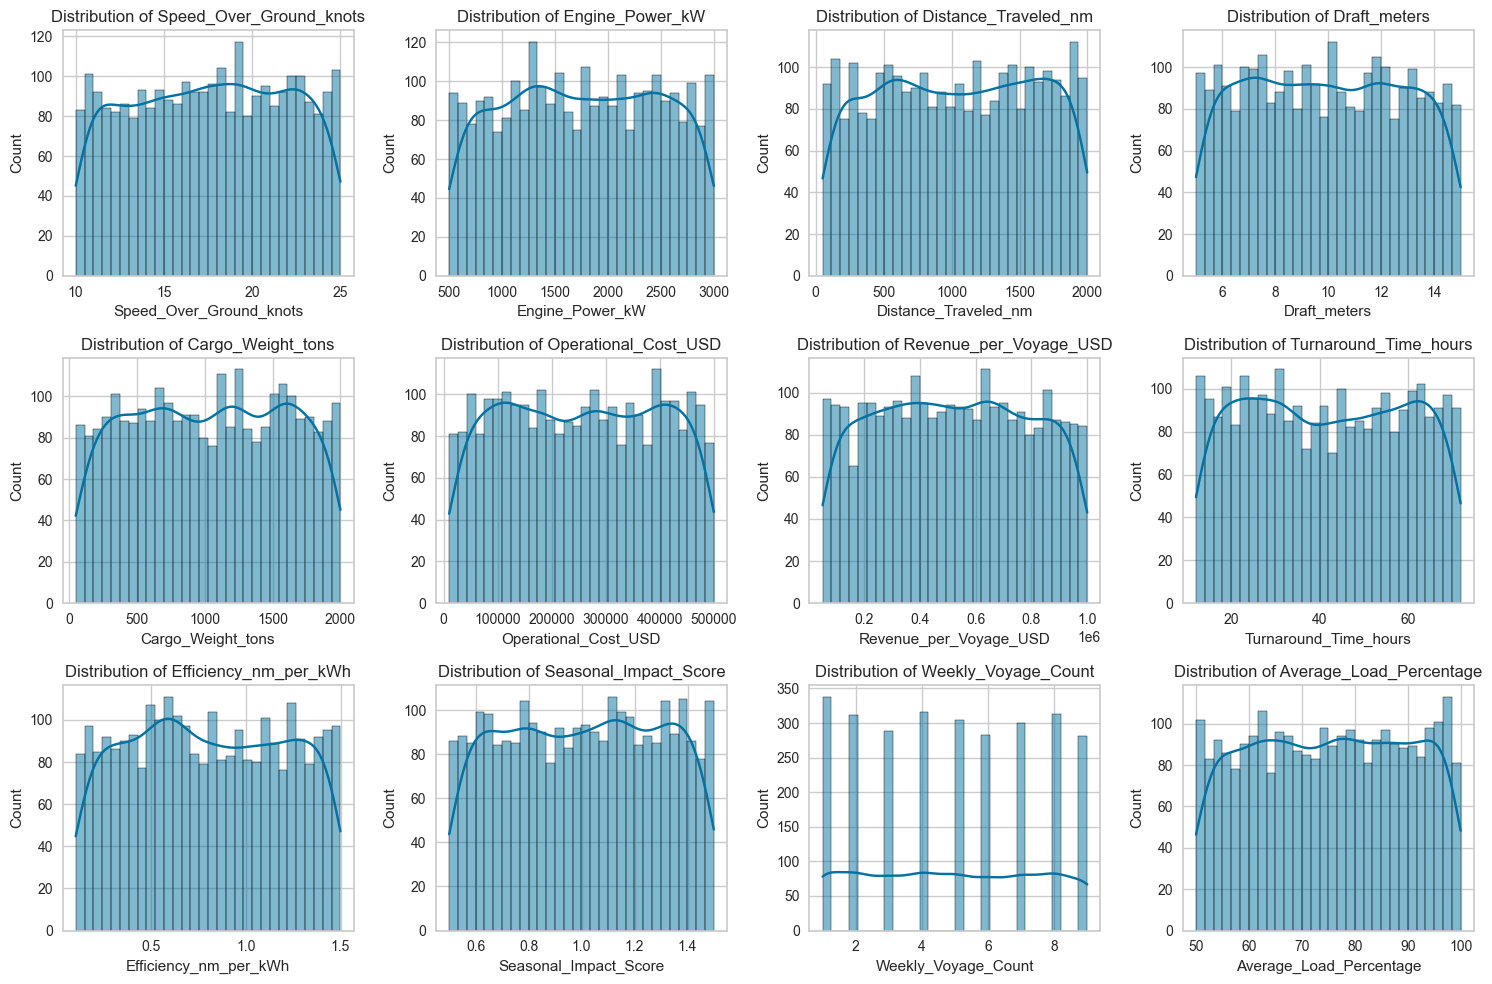

In [237]:
# Melihat distribusi data numerik menggunakan histogram
numeric_features = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

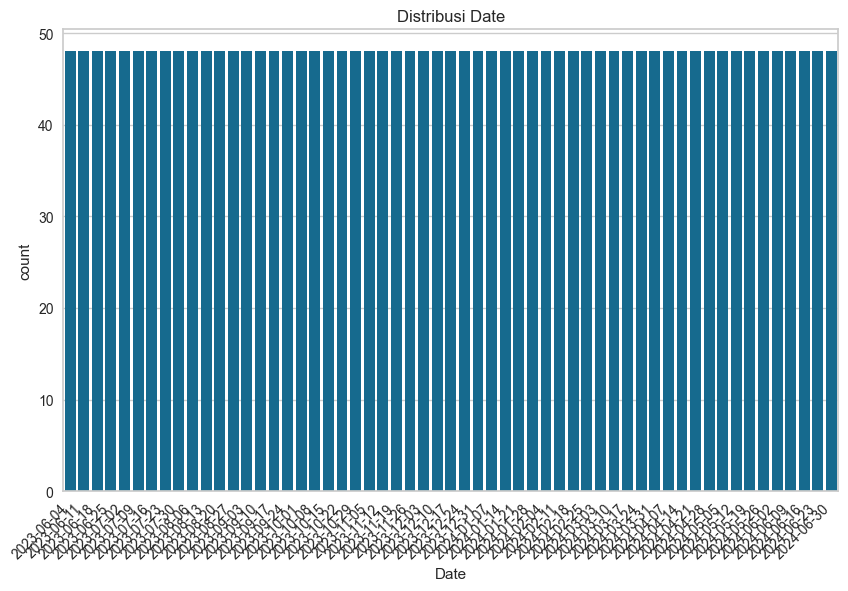

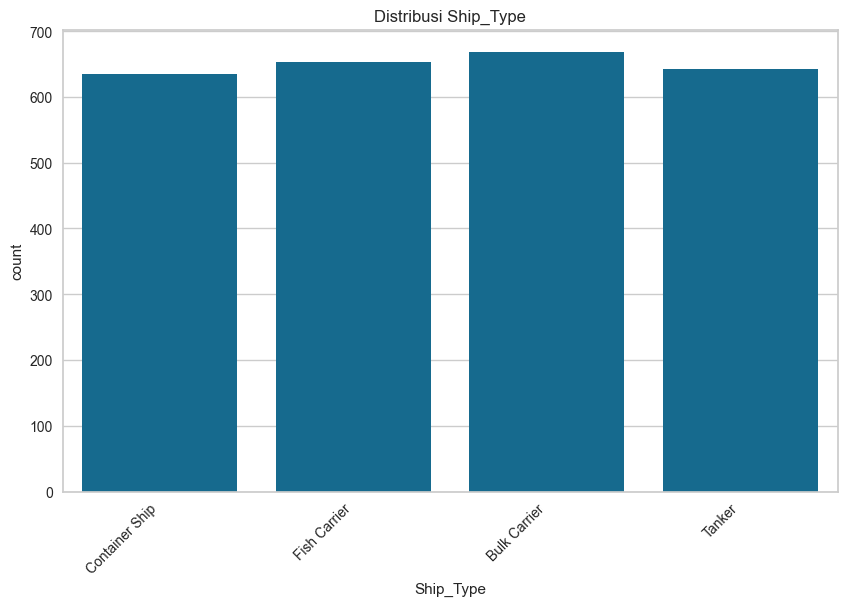

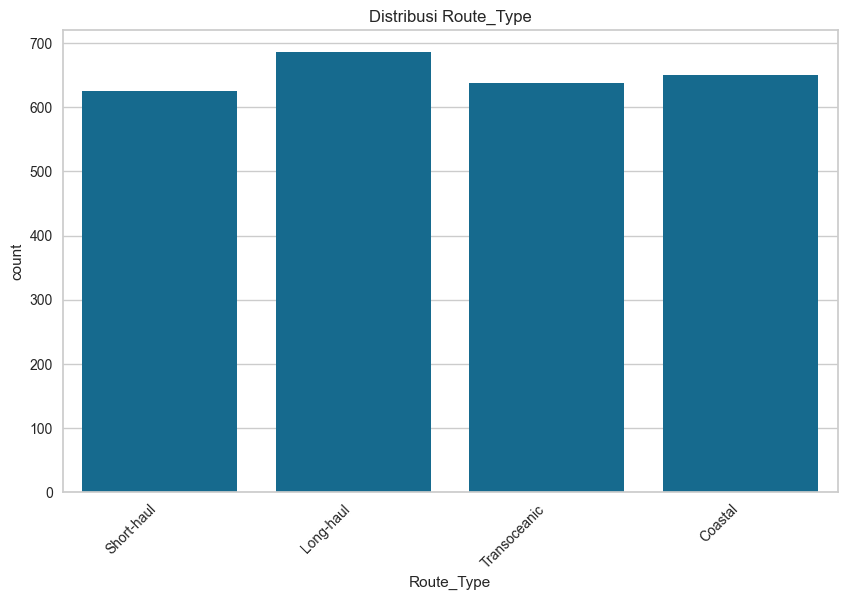

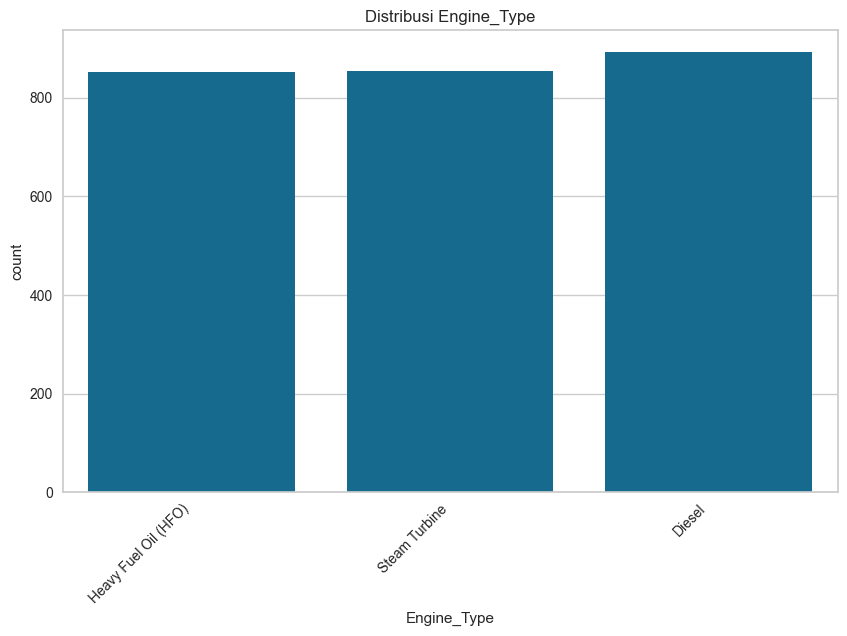

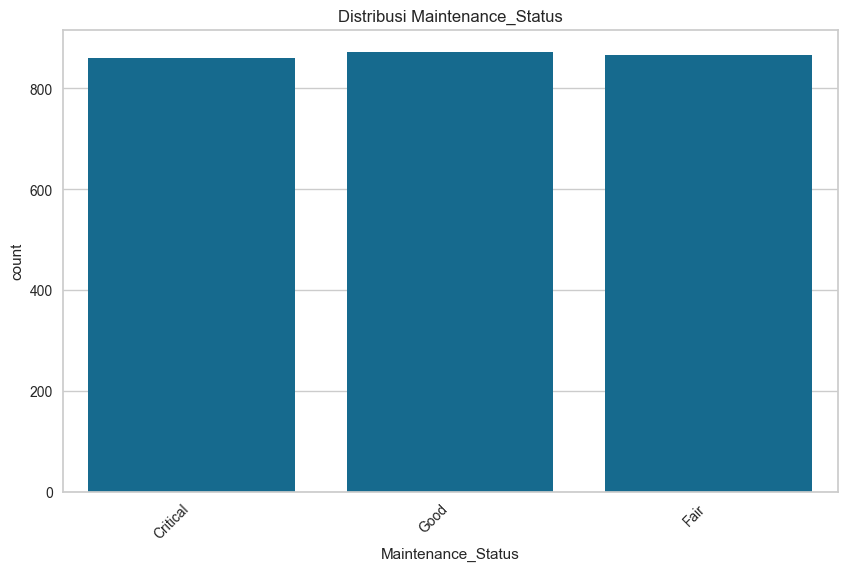

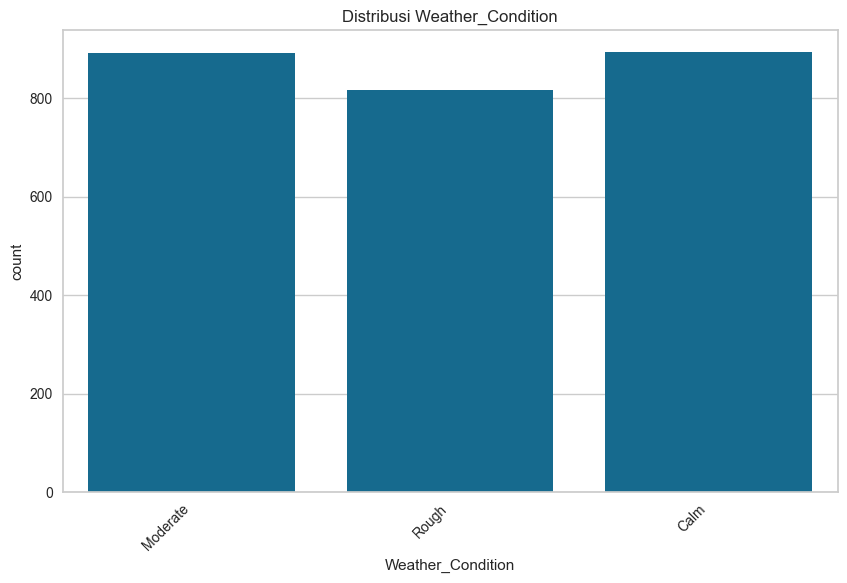

In [238]:
categorical_features = df.select_dtypes(include=['object']).columns

# Membuat bar chart untuk fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature])
    plt.xticks(rotation=45, ha='right')  # Memutar label jika terlalu panjang
    plt.title(f'Distribusi {feature}')
    plt.show()

**Insights**
- Seluruh data numerik tidak terdistribusi normal. 

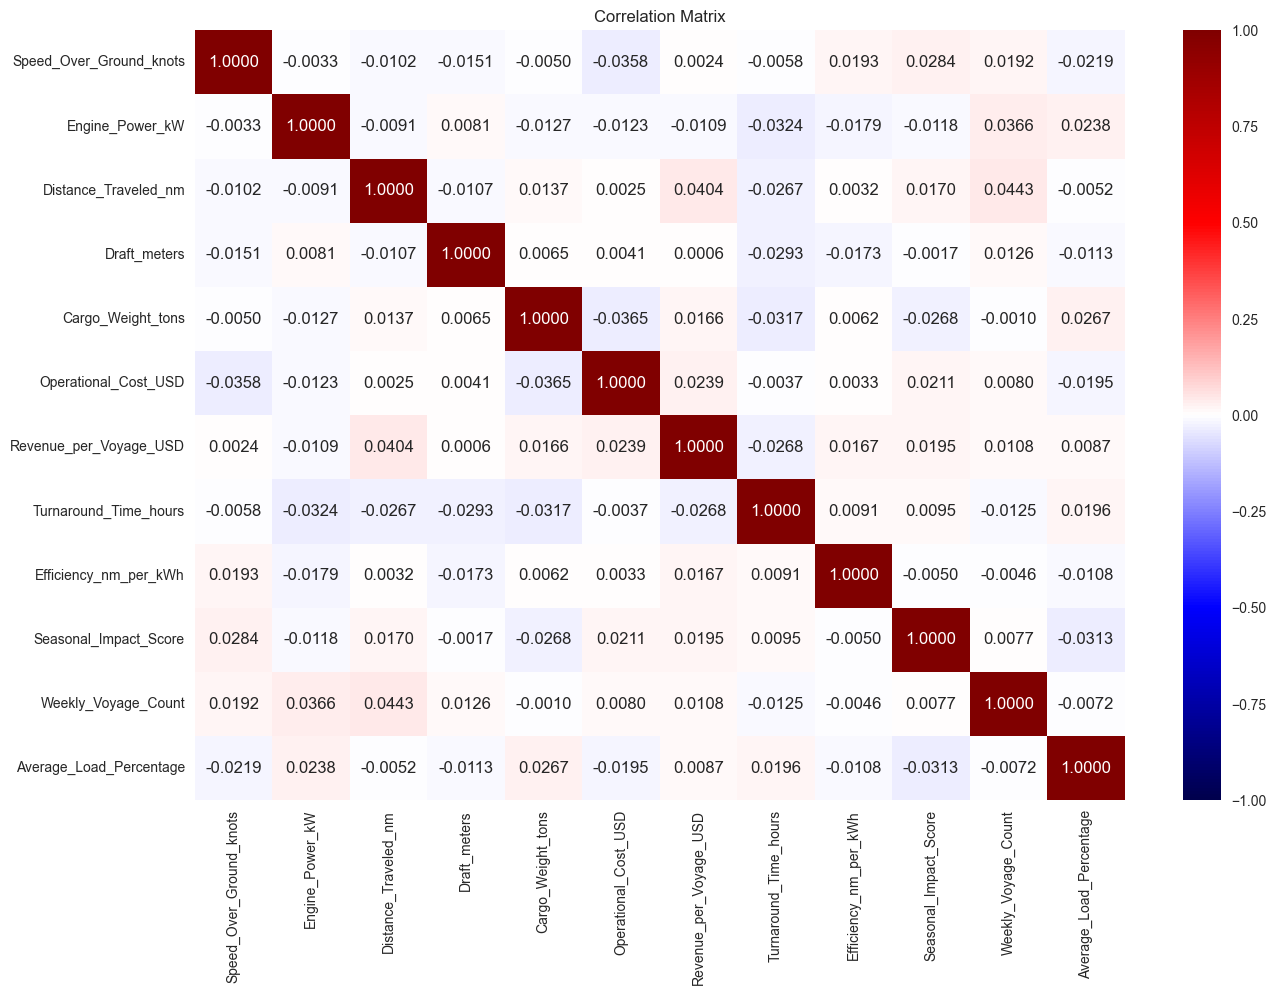

In [239]:
# Heatmap korelasi antar variabel numerik
numeric_features = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='seismic', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Insights:**
- Tidak ada korelasi yang kuat antar variabel

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [240]:
# Menangani Data kosong (Missing Value)
# Melihat Jumlah Data Kosong
df.isna().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [241]:
# Menghapus baris yang ada data kosong
df.dropna(inplace=True)
print(df.isna().sum())

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


In [242]:
# Melihat data duplikat
print('jumlah duplikasi data:', df.duplicated().sum())

jumlah duplikasi data: 0


In [243]:
# Menghilangkan fitur yang tidak relevan (date)
df.drop(columns=['Date'], inplace=True)
print(df.isna().sum())

Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


**Insights**
- Data yang hilang telah dihapus 
- Tidak ada data duplikat 
- Data tidak relevan dihapus (kolom date)

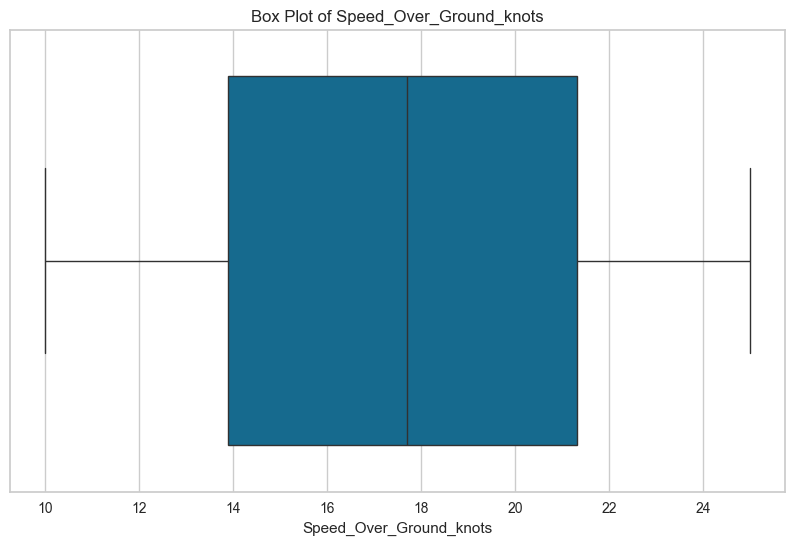

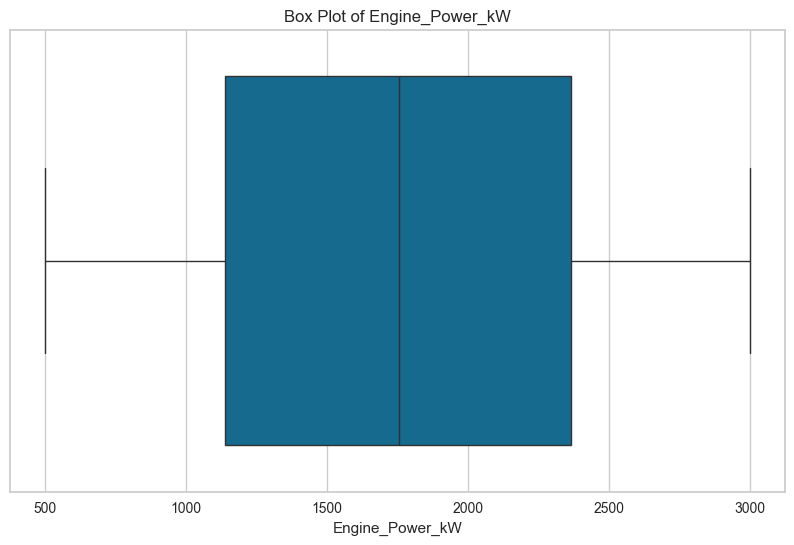

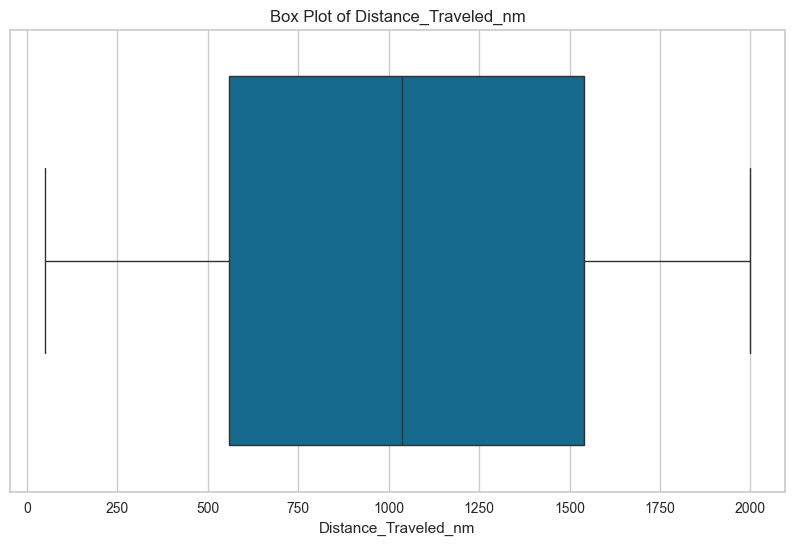

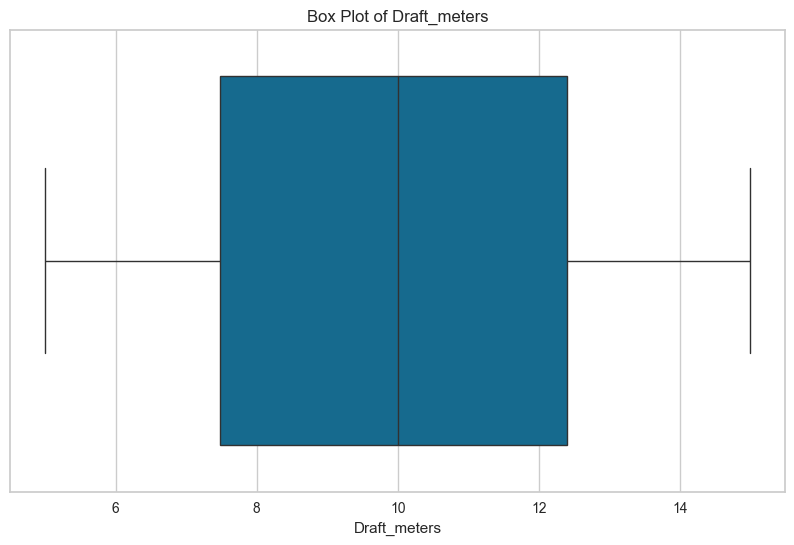

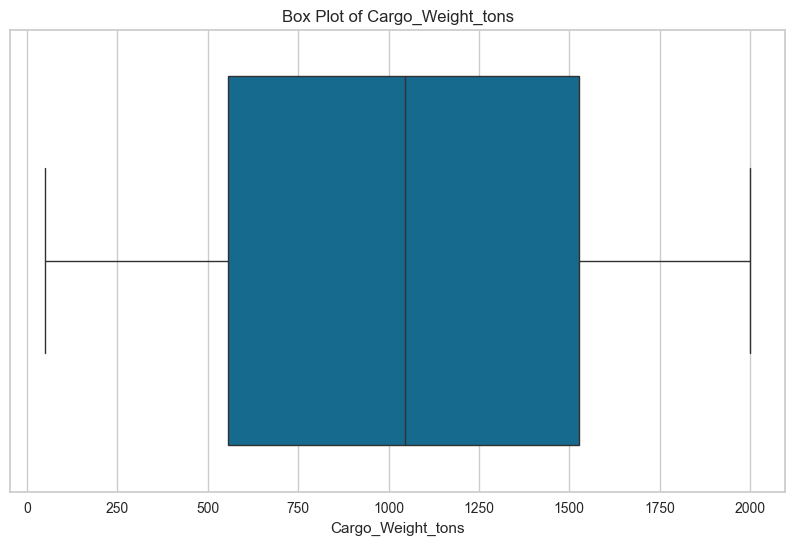

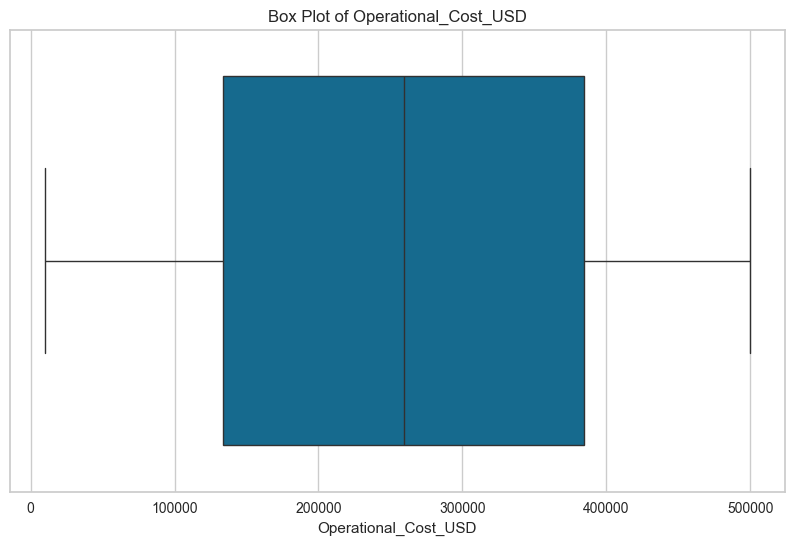

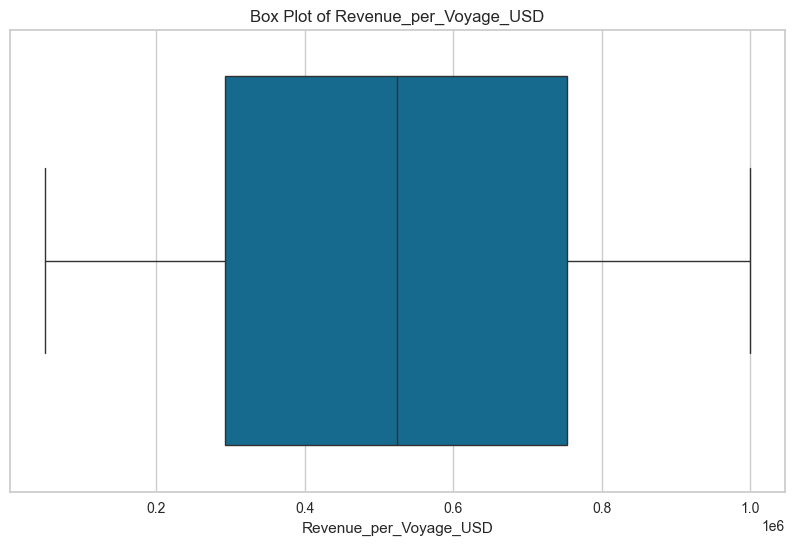

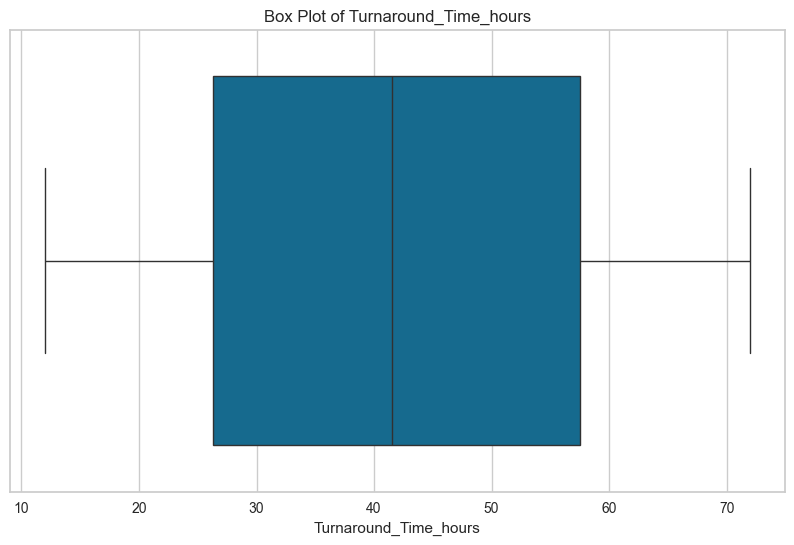

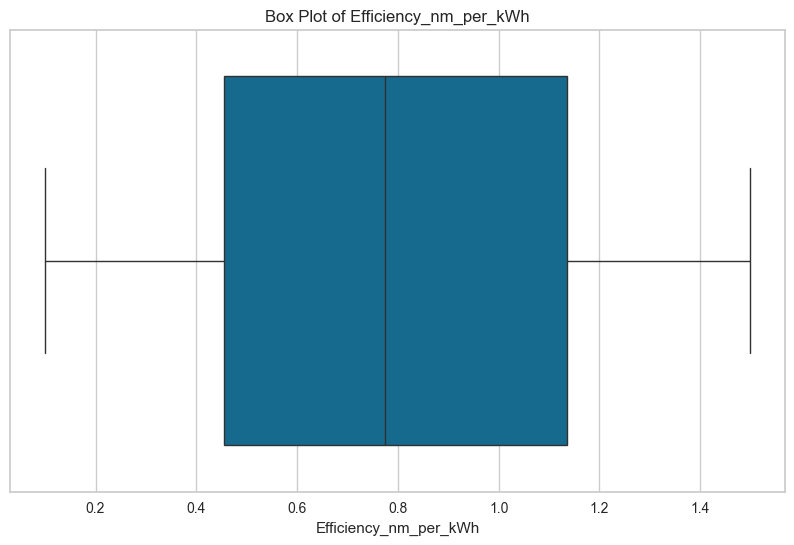

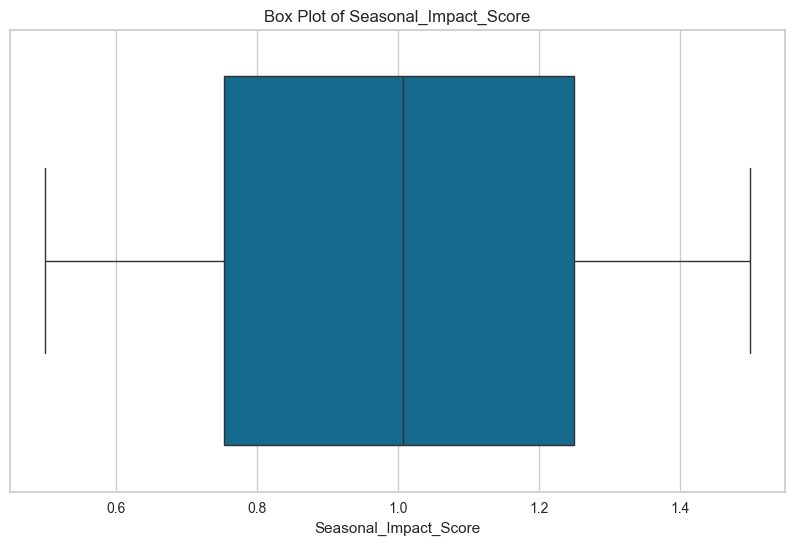

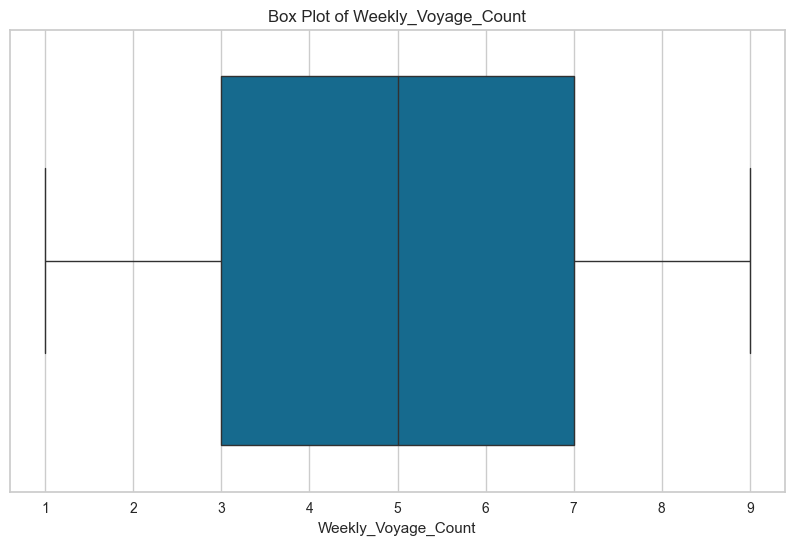

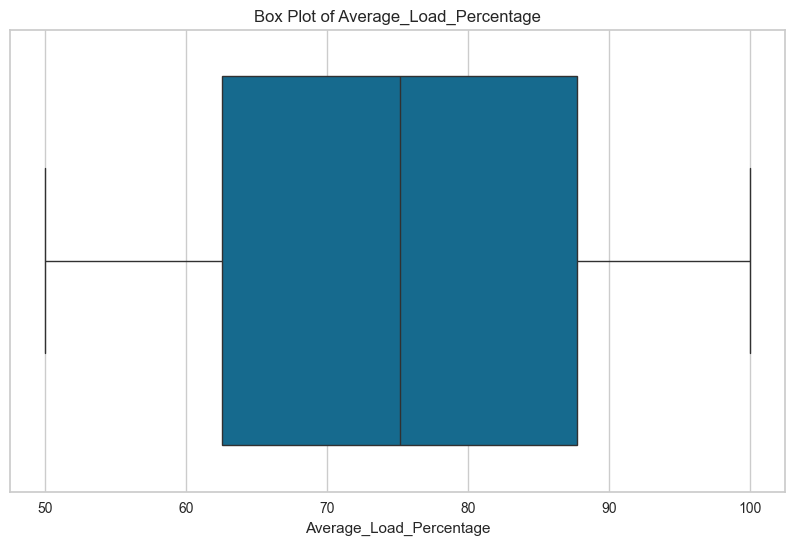

In [244]:
# Memeriksa Outlier pada data numerik (integer dan float)

numeric_features = df.select_dtypes(include=[np.number]).columns

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

**Insights**
- Data numerik tidak mempunyai outlier. 

In [245]:
# Encoding data kategorikal
# One hot encoding pada data nominal (Ship_Type dan Engine_Type)
df_encoded = df.copy()
df_encoded = df_encoded.reset_index(drop=True)
df_encoded = pd.get_dummies(df_encoded, columns=['Ship_Type', 'Engine_Type'], drop_first=False)

# Label encoding pada data ordinal (Route_Type, Maintenance_Status, Weather_Condition)
le = LabelEncoder()
df_encoded['Route_Type'] = le.fit_transform(df_encoded['Route_Type'])
df_encoded['Maintenance_Status'] = le.fit_transform(df_encoded['Maintenance_Status'])
df_encoded['Weather_Condition'] = le.fit_transform(df_encoded['Weather_Condition'])

df_encoded.head()

,Route_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,...,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type_Bulk Carrier,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine
0,2,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,...,0.885648,6,93.895372,False,False,True,False,False,False,True
1,1,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,...,1.405813,9,96.218244,False,True,False,False,True,False,False
2,3,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,...,1.370704,1,66.193698,True,False,False,False,False,False,True
3,3,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,...,0.583383,8,80.008581,False,False,True,False,True,False,False
4,1,1,18.616196,2171.646567,723.304215,14.916320,2,1912.509751,184569.045384,776698.354849,...,1.437725,7,53.174898,False,False,True,False,False,True,False


In [246]:
# Feature Scaling pada data numerik
numeric = df[['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
       'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage']]

scaler = StandardScaler()
numeric_standardize = scaler.fit_transform(numeric)
df_standardize = pd.DataFrame(numeric_standardize, columns=['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
       'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'])
      
df_standardize.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,-1.656879,0.063163,0.037942,1.650247,-1.562427,1.609770,1.335679,1.217541,-1.239500,-0.400920,0.419663,1.295430
1,0.721395,-0.143322,-0.670580,-0.971403,-1.534363,1.361956,-0.479685,0.433416,-0.720339,1.398181,1.570445,1.455764
2,0.791479,-1.169853,0.154971,0.642917,1.262606,0.030634,-1.615679,-1.097921,-0.215873,1.276750,-1.498307,-0.616654
3,-0.886811,-0.925628,0.716794,-0.082057,-1.386287,0.218169,0.565996,1.269137,1.343439,-1.446364,1.186851,0.336906
4,0.231713,0.588945,-0.556913,1.742832,1.576724,-0.515429,0.938808,0.323310,1.439868,1.508555,0.803257,-1.515265


In [247]:
df_new = df_standardize.copy()
missing_cols = set(df_encoded.columns) - set(df_new.columns)
print(missing_cols)

# Memasukkan kolom yang hilang ke df_new
for col in missing_cols:
    df_new[col] = df_encoded[col]

df_new.head()

{'Engine_Type_Diesel', 'Ship_Type_Tanker', 'Maintenance_Status', 'Engine_Type_Steam Turbine', 'Weather_Condition', 'Ship_Type_Fish Carrier', 'Ship_Type_Bulk Carrier', 'Ship_Type_Container Ship', 'Engine_Type_Heavy Fuel Oil (HFO)', 'Route_Type'}


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,...,Engine_Type_Diesel,Ship_Type_Tanker,Maintenance_Status,Engine_Type_Steam Turbine,Weather_Condition,Ship_Type_Fish Carrier,Ship_Type_Bulk Carrier,Ship_Type_Container Ship,Engine_Type_Heavy Fuel Oil (HFO),Route_Type
0,-1.656879,0.063163,0.037942,1.650247,-1.562427,1.609770,1.335679,1.217541,-1.239500,-0.400920,...,False,False,2,True,2,True,False,False,False,2
1,0.721395,-0.143322,-0.670580,-0.971403,-1.534363,1.361956,-0.479685,0.433416,-0.720339,1.398181,...,True,False,1,False,1,False,False,True,False,1
2,0.791479,-1.169853,0.154971,0.642917,1.262606,0.030634,-1.615679,-1.097921,-0.215873,1.276750,...,False,False,1,True,1,False,True,False,False,3
3,-0.886811,-0.925628,0.716794,-0.082057,-1.386287,0.218169,0.565996,1.269137,1.343439,-1.446364,...,True,False,1,False,1,True,False,False,False,3
4,0.231713,0.588945,-0.556913,1.742832,1.576724,-0.515429,0.938808,0.323310,1.439868,1.508555,...,False,False,1,False,2,True,False,False,True,1


In [248]:
df_new.drop(columns=['Draft_meters','Engine_Power_kW'], inplace=True, errors='ignore')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Speed_Over_Ground_knots           2127 non-null   float64
 1   Distance_Traveled_nm              2127 non-null   float64
 2   Cargo_Weight_tons                 2127 non-null   float64
 3   Operational_Cost_USD              2127 non-null   float64
 4   Revenue_per_Voyage_USD            2127 non-null   float64
 5   Turnaround_Time_hours             2127 non-null   float64
 6   Efficiency_nm_per_kWh             2127 non-null   float64
 7   Seasonal_Impact_Score             2127 non-null   float64
 8   Weekly_Voyage_Count               2127 non-null   float64
 9   Average_Load_Percentage           2127 non-null   float64
 10  Engine_Type_Diesel                2127 non-null   bool   
 11  Ship_Type_Tanker                  2127 non-null   bool   
 12  Mainte

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

#### Kmeans Model

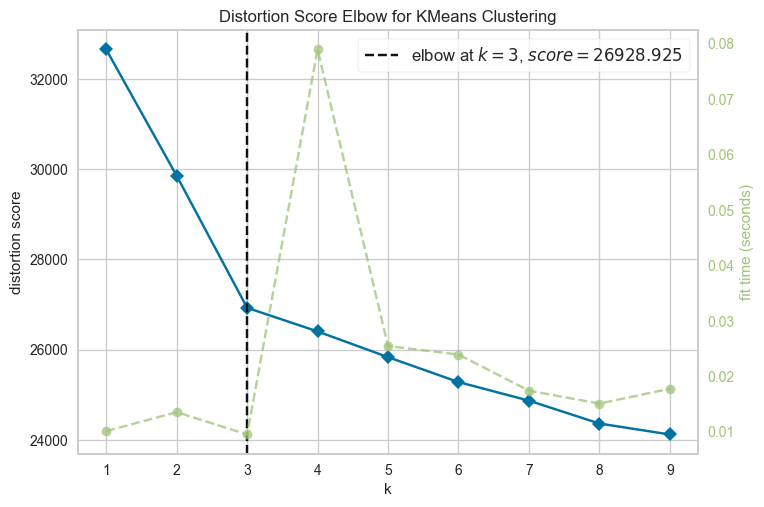

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [286]:
#Kmeans Model
#Type your code here
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_new)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

**Insights:**
- cluster optimal berjumlah 3

In [287]:
# Inisialisasi dan melatih model K-Means dengan jumlah cluster optimal berdasarkan elbow method
k_optimal = 3 # Hasil dari elbow method
kmeans1 = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels1= kmeans1.fit_predict(df_new)  # Menghasilkan label klaster

# Menyimpan hasil klustering ke dalam data frame
df_new['Cluster_Kmeans'] = kmeans_labels1
df_new.head()

,Speed_Over_Ground_knots,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,...,Weather_Condition,Ship_Type_Fish Carrier,Ship_Type_Bulk Carrier,Ship_Type_Container Ship,Engine_Type_Heavy Fuel Oil (HFO),Route_Type,Cluster_Kmeans,Cluster_KmeansPCA,Cluster_DBSCAN,Cluster_DBSCANPCA
0,-1.656879,0.037942,-1.562427,1.609770,1.335679,1.217541,-1.239500,-0.400920,0.419663,1.295430,...,2,True,False,False,False,2,1,2,-1,0
1,0.721395,-0.670580,-1.534363,1.361956,-0.479685,0.433416,-0.720339,1.398181,1.570445,1.455764,...,1,False,False,True,False,1,2,1,0,0
2,0.791479,0.154971,1.262606,0.030634,-1.615679,-1.097921,-0.215873,1.276750,-1.498307,-0.616654,...,1,False,True,False,False,3,0,0,0,0
3,-0.886811,0.716794,-1.386287,0.218169,0.565996,1.269137,1.343439,-1.446364,1.186851,0.336906,...,1,True,False,False,False,3,1,2,0,0
4,0.231713,-0.556913,1.576724,-0.515429,0.938808,0.323310,1.439868,1.508555,0.803257,-1.515265,...,2,True,False,False,True,1,2,1,0,0


In [288]:
# Evaluasi model menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_new, kmeans_labels1)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.1101


**Insights:**
- Silhouette score masih sangat rendah, sehingga perlu dilakukan feature selection atau metode PCA 

#### Reduksi Komponen dengan PCA

In [289]:
# Reduksi variabel menggunakan PCA
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_new.copy())

In [253]:
print(f"Jumlah data setelah PCA: {X_pca.shape[0]}")

Jumlah data setelah PCA: 2127


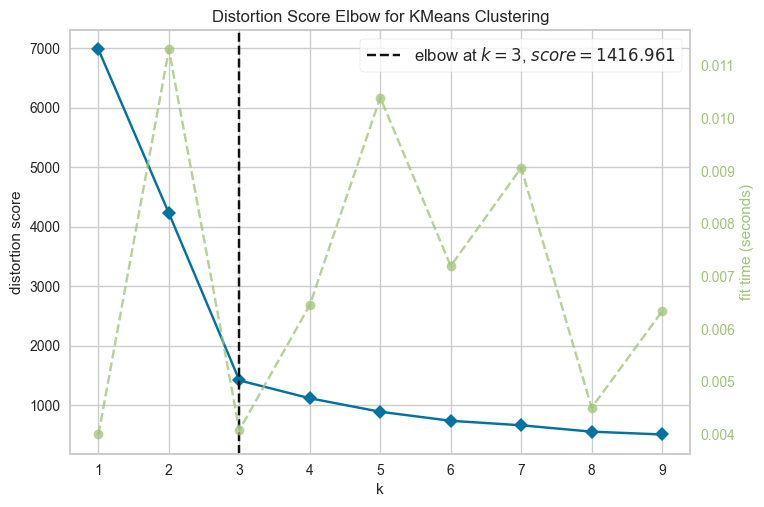

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [290]:
#Kmeans Model (PCA)
#Type your code here
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_pca)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

**Insights**
- Jumlah kluster optimal adaalah 3

#### KMeans PCA

In [291]:
# Inisialisasi dan melatih model K-Means dengan jumlah cluster optimal berdasarkan elbow method
k_optimal = 3  # Hasil dari elbow method
kmeans2 = KMeans(n_clusters=k_optimal, random_state=42)
kmeanspca_labels2= kmeans2.fit_predict(X_pca)  # Menghasilkan label klaster

# Menyimpan hasil klustering ke dalam data frame
df_new['Cluster_KmeansPCA'] = kmeanspca_labels2
df_new.head()

,Speed_Over_Ground_knots,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,...,Weather_Condition,Ship_Type_Fish Carrier,Ship_Type_Bulk Carrier,Ship_Type_Container Ship,Engine_Type_Heavy Fuel Oil (HFO),Route_Type,Cluster_Kmeans,Cluster_KmeansPCA,Cluster_DBSCAN,Cluster_DBSCANPCA
0,-1.656879,0.037942,-1.562427,1.609770,1.335679,1.217541,-1.239500,-0.400920,0.419663,1.295430,...,2,True,False,False,False,2,1,1,-1,0
1,0.721395,-0.670580,-1.534363,1.361956,-0.479685,0.433416,-0.720339,1.398181,1.570445,1.455764,...,1,False,False,True,False,1,2,2,0,0
2,0.791479,0.154971,1.262606,0.030634,-1.615679,-1.097921,-0.215873,1.276750,-1.498307,-0.616654,...,1,False,True,False,False,3,0,0,0,0
3,-0.886811,0.716794,-1.386287,0.218169,0.565996,1.269137,1.343439,-1.446364,1.186851,0.336906,...,1,True,False,False,False,3,1,1,0,0
4,0.231713,-0.556913,1.576724,-0.515429,0.938808,0.323310,1.439868,1.508555,0.803257,-1.515265,...,2,True,False,False,True,1,2,2,0,0


In [256]:
print(f"Jumlah data setelah PCA: {df_new['Cluster_KmeansPCA'].shape[0]}")

Jumlah data setelah PCA: 2127


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

#### Perbandingan hasil Evaluasi

In [292]:
# Evaluasi model menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_new, kmeans_labels1)
print(f"Silhouette Score Kmeans: {silhouette_avg:.4f}")


# Evaluasi model Kmeans PCA menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca, kmeanspca_labels2)
print(f"Silhouette Score Kmeans PCA: {silhouette_avg:.4f}")



Silhouette Score Kmeans: 0.1020
Silhouette Score Kmeans PCA: 0.6086


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [258]:
#Menghapus variance yang rendah
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].var()

Speed_Over_Ground_knots    1.899247e+01
Engine_Power_kW            5.105256e+05
Distance_Traveled_nm       3.214486e+05
Draft_meters               8.087471e+00
Cargo_Weight_tons          3.109660e+05
Operational_Cost_USD       1.977976e+10
Revenue_per_Voyage_USD     7.281495e+10
Turnaround_Time_hours      3.112296e+02
Efficiency_nm_per_kWh      1.625033e-01
Seasonal_Impact_Score      8.363270e-02
Weekly_Voyage_Count        6.799245e+00
Average_Load_Percentage    2.099918e+02
dtype: float64

**Insights:**
- Terdapat 2 fitur yang memiliki variance paling rendah yaitu Efficiency_nm_per_kWh dan Seasonal_Impact_Score 

In [259]:
df_selected = df.copy()
# Menghapus kolom dengan variance yang rendah
kolom_yang_dihapus = ['Efficiency_nm_per_kWh', 'Seasonal_Impact_Score']
df_selected = df.copy().drop(kolom_yang_dihapus, axis=1)
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2127 non-null   object 
 1   Route_Type               2127 non-null   object 
 2   Engine_Type              2127 non-null   object 
 3   Maintenance_Status       2127 non-null   object 
 4   Speed_Over_Ground_knots  2127 non-null   float64
 5   Engine_Power_kW          2127 non-null   float64
 6   Distance_Traveled_nm     2127 non-null   float64
 7   Draft_meters             2127 non-null   float64
 8   Weather_Condition        2127 non-null   object 
 9   Cargo_Weight_tons        2127 non-null   float64
 10  Operational_Cost_USD     2127 non-null   float64
 11  Revenue_per_Voyage_USD   2127 non-null   float64
 12  Turnaround_Time_hours    2127 non-null   float64
 13  Weekly_Voyage_Count      2127 non-null   int64  
 14  Average_Load_Percentage  2127

##### Standardization

In [260]:
# Feature Scaling (Min-Max Method)
numeric_features1 = df_selected.select_dtypes(include=[np.number]).columns

scaler1 = MinMaxScaler()
numeric_normalization = scaler.fit_transform(df[numeric_features1])
df_normalization= pd.DataFrame(numeric_normalization, columns=[numeric_features1])
df_normalization.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage
0,-1.656879,0.063163,0.037942,1.650247,-1.562427,1.609770,1.335679,1.217541,0.419663,1.295430
1,0.721395,-0.143322,-0.670580,-0.971403,-1.534363,1.361956,-0.479685,0.433416,1.570445,1.455764
2,0.791479,-1.169853,0.154971,0.642917,1.262606,0.030634,-1.615679,-1.097921,-1.498307,-0.616654
3,-0.886811,-0.925628,0.716794,-0.082057,-1.386287,0.218169,0.565996,1.269137,1.186851,0.336906
4,0.231713,0.588945,-0.556913,1.742832,1.576724,-0.515429,0.938808,0.323310,0.803257,-1.515265


In [261]:
df_new1 = df_normalization.copy()
missing_cols = set(df_encoded.columns) - set(df_new1.columns)
print(missing_cols)

# Memasukkan kolom yang hilang ke df_new
for col in missing_cols:
    df_new1[col] = df_encoded[col]

df_new1.head()

{'Speed_Over_Ground_knots', 'Engine_Type_Diesel', 'Seasonal_Impact_Score', 'Maintenance_Status', 'Cargo_Weight_tons', 'Route_Type', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Weather_Condition', 'Ship_Type_Fish Carrier', 'Ship_Type_Bulk Carrier', 'Draft_meters', 'Turnaround_Time_hours', 'Weekly_Voyage_Count', 'Average_Load_Percentage', 'Engine_Type_Steam Turbine', 'Operational_Cost_USD', 'Efficiency_nm_per_kWh', 'Ship_Type_Container Ship', 'Ship_Type_Tanker', 'Revenue_per_Voyage_USD', 'Engine_Type_Heavy Fuel Oil (HFO)'}


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage,...,Maintenance_Status,Route_Type,Weather_Condition,Ship_Type_Fish Carrier,Ship_Type_Bulk Carrier,Engine_Type_Steam Turbine,Efficiency_nm_per_kWh,Ship_Type_Container Ship,Ship_Type_Tanker,Engine_Type_Heavy Fuel Oil (HFO)
0,10.387580,1796.057415,1060.486382,14.653083,162.394712,483388.000509,883765.787360,63.248196,6,93.895372,...,2,2,2,True,False,True,0.290361,False,False,False
1,20.749747,1648.556685,658.874144,7.199261,178.040917,448543.404044,394018.746904,49.418150,9,96.218244,...,1,1,1,False,False,False,0.499595,True,False,False
2,21.055102,915.261795,1126.822519,11.789063,1737.385346,261349.605449,87551.375175,22.409110,1,66.193698,...,1,3,1,False,True,True,0.702906,False,False,False
3,13.742777,1089.721803,1445.281159,9.727833,260.595103,287718.375160,676121.459632,64.158231,8,80.008581,...,1,3,1,True,False,False,1.331343,False,False,False
4,18.616196,2171.646567,723.304215,14.916320,1912.509751,184569.045384,776698.354849,47.476155,7,53.174898,...,1,1,2,True,False,False,1.370206,False,False,True


**Insights**
- Data frame baru (df_new1) dengan menghapus fitur yang memiliki variance rendah serta telah di scaling dengan metode min-max. 

#### Model Kmeans dengan Feature Selection

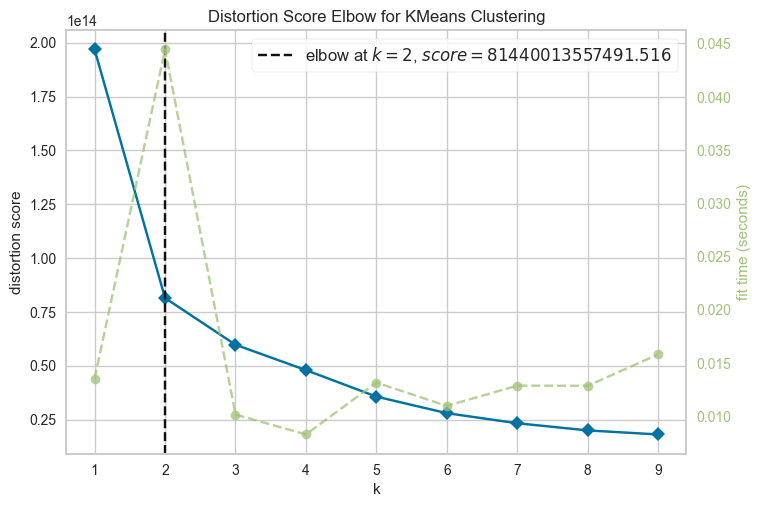

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [262]:
#Kmeans Model
#Type your code here
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_new1)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

#### Kmeans dengan Feature Selection

In [293]:
# Inisialisasi dan melatih model K-Means dengan jumlah cluster optimal berdasarkan elbow method
k_optimal3 = 2  # Hasil dari elbow method
kmeans3 = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels3= kmeans3.fit_predict(df_new1)  # Menghasilkan label klaster

# Menyimpan hasil klustering ke dalam data frame
df_new1['Cluster_Kmeans'] = kmeans_labels3
df_new1.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage,...,Weather_Condition,Ship_Type_Fish Carrier,Ship_Type_Bulk Carrier,Engine_Type_Steam Turbine,Efficiency_nm_per_kWh,Ship_Type_Container Ship,Ship_Type_Tanker,Engine_Type_Heavy Fuel Oil (HFO),Cluster_Kmeans,Cluster_KmeansPCA
0,10.387580,1796.057415,1060.486382,14.653083,162.394712,483388.000509,883765.787360,63.248196,6,93.895372,...,2,True,False,True,0.290361,False,False,False,0,0
1,20.749747,1648.556685,658.874144,7.199261,178.040917,448543.404044,394018.746904,49.418150,9,96.218244,...,1,False,False,False,0.499595,True,False,False,1,1
2,21.055102,915.261795,1126.822519,11.789063,1737.385346,261349.605449,87551.375175,22.409110,1,66.193698,...,1,False,True,True,0.702906,False,False,False,2,2
3,13.742777,1089.721803,1445.281159,9.727833,260.595103,287718.375160,676121.459632,64.158231,8,80.008581,...,1,True,False,False,1.331343,False,False,False,1,1
4,18.616196,2171.646567,723.304215,14.916320,1912.509751,184569.045384,776698.354849,47.476155,7,53.174898,...,2,True,False,False,1.370206,False,False,True,0,0


In [264]:
# Cek Silhouette Score
# Evaluasi model Kmeans (Feature_Selection) menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_new1, kmeans_labels3)
print(f"Silhouette Score Kmeans (Feature Selection): {silhouette_avg:.4f}")

Silhouette Score Kmeans (Feature Selection): 0.3645


**Insights**
- Nilai silhouette score lebih baik dari Kmeans yang pertama (tanpa feature selected), namun masih belum mencapai target, oleh karena itu dilanjutan dengan PCA untuk mereduksi komponen (fitur). 

#### KMeans dengan Feature Selection (PCA)

In [294]:
# Reduksi variabel menggunakan PCA
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca1 = pca.fit_transform(df_new1.copy())
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])


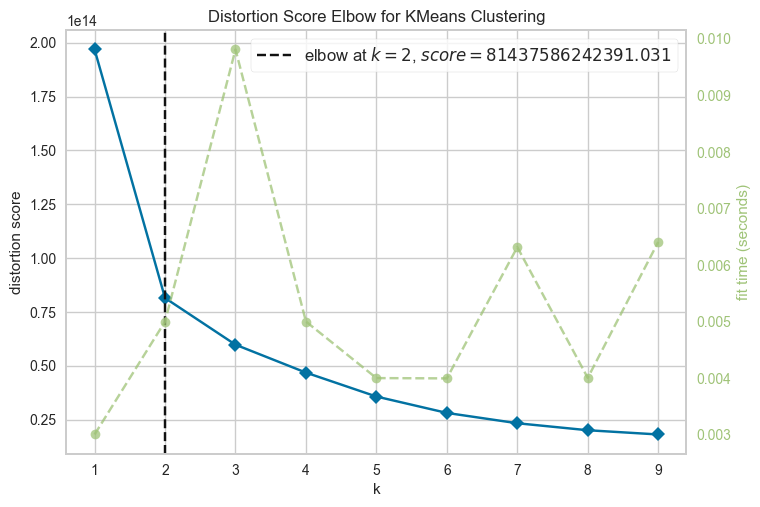

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [266]:
#Kmeans Model
#Type your code here
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_pca1)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [267]:
# Inisialisasi dan melatih model K-Means dengan jumlah cluster optimal berdasarkan elbow method
k_optimal4 = 2  # Hasil dari elbow method
kmeans4 = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels4= kmeans4.fit_predict(X_pca1)  # Menghasilkan label klaster

# Menyimpan hasil klustering ke dalam data frame
df_new1['Cluster_KmeansPCA'] = kmeans_labels4
df_new1.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage,...,Weather_Condition,Ship_Type_Fish Carrier,Ship_Type_Bulk Carrier,Engine_Type_Steam Turbine,Efficiency_nm_per_kWh,Ship_Type_Container Ship,Ship_Type_Tanker,Engine_Type_Heavy Fuel Oil (HFO),Cluster_Kmeans,Cluster_KmeansPCA
0,10.387580,1796.057415,1060.486382,14.653083,162.394712,483388.000509,883765.787360,63.248196,6,93.895372,...,2,True,False,True,0.290361,False,False,False,0,0
1,20.749747,1648.556685,658.874144,7.199261,178.040917,448543.404044,394018.746904,49.418150,9,96.218244,...,1,False,False,False,0.499595,True,False,False,1,1
2,21.055102,915.261795,1126.822519,11.789063,1737.385346,261349.605449,87551.375175,22.409110,1,66.193698,...,1,False,True,True,0.702906,False,False,False,2,2
3,13.742777,1089.721803,1445.281159,9.727833,260.595103,287718.375160,676121.459632,64.158231,8,80.008581,...,1,True,False,False,1.331343,False,False,False,1,1
4,18.616196,2171.646567,723.304215,14.916320,1912.509751,184569.045384,776698.354849,47.476155,7,53.174898,...,2,True,False,False,1.370206,False,False,True,0,0


In [295]:
# Cek Silhouette Score
# Evaluasi model Kmeans (Feature_Selection) menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca1, kmeans_labels4)
print(f"Silhouette Score Kmeans (Feature Selection): {silhouette_avg:.4f}")

Silhouette Score Kmeans (Feature Selection): 0.3645


#### Metode Lain (DBSCAN)

MinPts yang direkomendasikan: 44


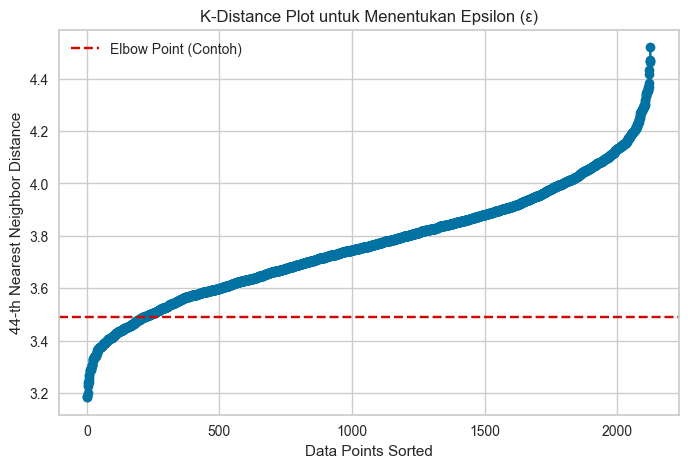

Jarak ke elbow point yang direkomendasikan: 3.4887209593179804


In [269]:
# Menentukan k-distance plot menggunakan KNN
from sklearn.neighbors import NearestNeighbors

# Menentukan MinPts
min_pts = 2 * df_new.shape[1]
print(f"MinPts yang direkomendasikan: {min_pts}")

# Hitung jarak KNN untuk setiap titik dengan MinPts sebagai k
nbrs1 = NearestNeighbors(n_neighbors=min_pts).fit(df_new)
distances1, indices = nbrs1.kneighbors(df_new)

# Ambil jarak ke tetangga ke-MinPts (bukan ke diri sendiri)
k_distances1 = np.sort(distances1[:, -1])

# Plot k-distance untuk menemukan elbow point
plt.figure(figsize=(8, 5))
plt.plot(k_distances1, marker="o", linestyle="dashed", color="b")
plt.xlabel("Data Points Sorted")
plt.ylabel(f"{min_pts}-th Nearest Neighbor Distance")
plt.title("K-Distance Plot untuk Menentukan Epsilon (ε)")
plt.grid(True)

# Menambahkan garis horizontal untuk membantu visualisasi
plt.axhline(y=k_distances1[int(len(k_distances1) * 0.1)], color='r', linestyle='--', label='Elbow Point (Contoh)')
plt.legend()
plt.show()

# Mencetak jarak ke elbow point
elbow_point_distance = k_distances1[int(len(k_distances1) * 0.1)]
print(f"Jarak ke elbow point yang direkomendasikan: {elbow_point_distance}")


plt.show()

In [270]:
from sklearn.cluster import DBSCAN

# Parameter DBSCAN
epsilon = elbow_point_distance  # Sesuaikan dengan hasil elbow
min_pts = min_pts   # Sesuai jumlah fitur x 2

# Inisialisasi dan fit DBSCAN
dbscan1 = DBSCAN(eps=epsilon, min_samples=min_pts)
dbscan_labels1 = dbscan1.fit_predict(df_new)

# Tambahkan hasil cluster ke dataframe
df_new['Cluster_DBSCAN'] = dbscan_labels1  # Pastikan penamaan kolom konsisten

df_new.head()

,Speed_Over_Ground_knots,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,...,Engine_Type_Steam Turbine,Weather_Condition,Ship_Type_Fish Carrier,Ship_Type_Bulk Carrier,Ship_Type_Container Ship,Engine_Type_Heavy Fuel Oil (HFO),Route_Type,Cluster_Kmeans,Cluster_KmeansPCA,Cluster_DBSCAN
0,-1.656879,0.037942,-1.562427,1.609770,1.335679,1.217541,-1.239500,-0.400920,0.419663,1.295430,...,True,2,True,False,False,False,2,1,2,-1
1,0.721395,-0.670580,-1.534363,1.361956,-0.479685,0.433416,-0.720339,1.398181,1.570445,1.455764,...,False,1,False,False,True,False,1,2,1,0
2,0.791479,0.154971,1.262606,0.030634,-1.615679,-1.097921,-0.215873,1.276750,-1.498307,-0.616654,...,True,1,False,True,False,False,3,1,0,0
3,-0.886811,0.716794,-1.386287,0.218169,0.565996,1.269137,1.343439,-1.446364,1.186851,0.336906,...,False,1,True,False,False,False,3,1,2,0
4,0.231713,-0.556913,1.576724,-0.515429,0.938808,0.323310,1.439868,1.508555,0.803257,-1.515265,...,False,2,True,False,False,True,1,2,1,0


In [271]:
#Evaluasi menggunakan Silhouette Score
# Evaluasi model DBSCAN  menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_new, dbscan_labels1)
print(f"Silhouette Score DBSCAN: {silhouette_avg:.4f}")

Silhouette Score DBSCAN: 0.0724


#### Metode DBSCAN dengan PCA

MinPts yang direkomendasikan: 4


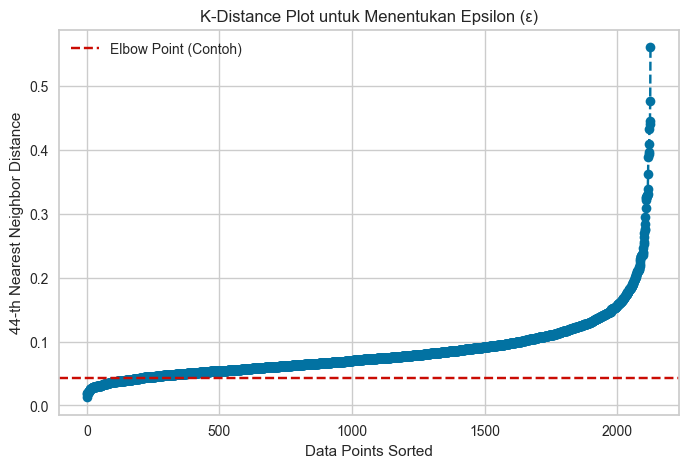

Jarak ke elbow point yang direkomendasikan: 0.04321218233223657


In [272]:
# Menentukan k-distance plot menggunakan KNN
from sklearn.neighbors import NearestNeighbors

# Menentukan MinPts
min_pts2 = 2 * X_pca.shape[1]
print(f"MinPts yang direkomendasikan: {min_pts2}")

# Hitung jarak KNN untuk setiap titik dengan MinPts sebagai k
nbrs2 = NearestNeighbors(n_neighbors=min_pts2).fit(X_pca)
distances2, indices = nbrs2.kneighbors(X_pca)

# Ambil jarak ke tetangga ke-MinPts (bukan ke diri sendiri)
k_distances2 = np.sort(distances2[:, -1])

# Plot k-distance untuk menemukan elbow point
plt.figure(figsize=(8, 5))
plt.plot(k_distances2, marker="o", linestyle="dashed", color="b")
plt.xlabel("Data Points Sorted")
plt.ylabel(f"{min_pts}-th Nearest Neighbor Distance")
plt.title("K-Distance Plot untuk Menentukan Epsilon (ε)")
plt.grid(True)

# Menambahkan garis horizontal untuk membantu visualisasi
plt.axhline(y=k_distances2[int(len(k_distances2) * 0.1)], color='r', linestyle='--', label='Elbow Point (Contoh)')
plt.legend()
plt.show()

# Mencetak jarak ke elbow point
elbow_point_distance2 = k_distances2[int(len(k_distances2) * 0.1)]
print(f"Jarak ke elbow point yang direkomendasikan: {elbow_point_distance2}")


plt.show()

In [273]:
from sklearn.cluster import DBSCAN

# Parameter DBSCAN
epsilon2 = elbow_point_distance2  # Sesuaikan dengan hasil elbow
min_pts2 = min_pts2   # Sesuai jumlah fitur x 2

# Inisialisasi dan fit DBSCAN
dbscan2 = DBSCAN(eps=epsilon, min_samples=min_pts)
dbscan_labels2 = dbscan1.fit_predict(X_pca)

# Tambahkan hasil cluster ke dataframe
df_new['Cluster_DBSCANPCA'] = dbscan_labels2  # Pastikan penamaan kolom konsisten

df_new.head()

,Speed_Over_Ground_knots,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,...,Weather_Condition,Ship_Type_Fish Carrier,Ship_Type_Bulk Carrier,Ship_Type_Container Ship,Engine_Type_Heavy Fuel Oil (HFO),Route_Type,Cluster_Kmeans,Cluster_KmeansPCA,Cluster_DBSCAN,Cluster_DBSCANPCA
0,-1.656879,0.037942,-1.562427,1.609770,1.335679,1.217541,-1.239500,-0.400920,0.419663,1.295430,...,2,True,False,False,False,2,1,2,-1,0
1,0.721395,-0.670580,-1.534363,1.361956,-0.479685,0.433416,-0.720339,1.398181,1.570445,1.455764,...,1,False,False,True,False,1,2,1,0,0
2,0.791479,0.154971,1.262606,0.030634,-1.615679,-1.097921,-0.215873,1.276750,-1.498307,-0.616654,...,1,False,True,False,False,3,1,0,0,0
3,-0.886811,0.716794,-1.386287,0.218169,0.565996,1.269137,1.343439,-1.446364,1.186851,0.336906,...,1,True,False,False,False,3,1,2,0,0
4,0.231713,-0.556913,1.576724,-0.515429,0.938808,0.323310,1.439868,1.508555,0.803257,-1.515265,...,2,True,False,False,True,1,2,1,0,0


**Insights**
- Penggunaan DBSCAN kurang baik, ditindai dengan jumlah kluster yang terlalu sedikit, bahkan DBSCAN menggunakan PCA menghasilkan 1 kluster saja.
- Selain itu nilai silhouette scorenya yang rendah. 


#### Perbandingan Evaluasi

In [274]:
# Evaluasi model menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_new, kmeans_labels1)
print(f"Silhouette Score Kmeans: {silhouette_avg:.4f}")


# Evaluasi model Kmeans PCA menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca, kmeanspca_labels2)
print(f"Silhouette Score Kmeans PCA: {silhouette_avg:.4f}")

# Cek Silhouette Score
# Evaluasi model Kmeans (Feature_Selection) menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_new1, kmeans_labels3)
print(f"Silhouette Score Kmeans (Feature Selection): {silhouette_avg:.4f}")


# Cek Silhouette Score
# Evaluasi model Kmeans (Feature_Selection) menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca1, kmeans_labels4)
print(f"Silhouette Score Kmeans PCA (Feature Selection): {silhouette_avg:.4f}")


#Evaluasi menggunakan Silhouette Score
# Evaluasi model DBSCAN  menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_new, dbscan_labels1)
print(f"Silhouette Score DBSCAN: {silhouette_avg:.4f}")


Silhouette Score Kmeans: 0.1093
Silhouette Score Kmeans PCA: 0.4936
Silhouette Score Kmeans (Feature Selection): 0.3645
Silhouette Score Kmeans PCA (Feature Selection): 0.3645
Silhouette Score DBSCAN: 0.0724


**Insights:**
- Berdasarkan hasil evaluasi, model KMeans PCA lebih baik dibandingkan yang lainnya. 

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

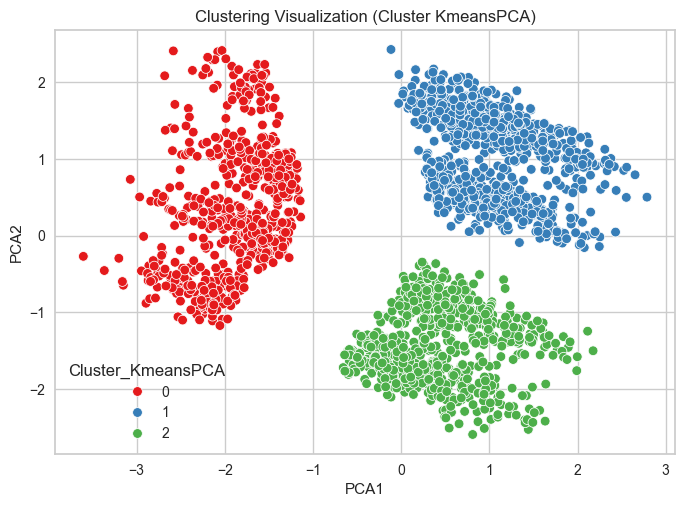

Silhouette Score Kmeans PCA: 0.6086


In [296]:
sns.scatterplot(
    x=df_pca['PCA1'], 
    y=df_pca['PCA2'], 
    hue=df_new['Cluster_KmeansPCA'], 
    palette='Set1')
plt.title("Clustering Visualization (Cluster KmeansPCA)")
plt.show()

# Evaluasi model Kmeans PCA menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca, kmeanspca_labels2)
print(f"Silhouette Score Kmeans PCA: {silhouette_avg:.4f}")

In [276]:
df_new['Cluster_KmeansPCA'].info()
df_new.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2127 entries, 0 to 2126
Series name: Cluster_KmeansPCA
Non-Null Count  Dtype
--------------  -----
2127 non-null   int32
dtypes: int32(1)
memory usage: 8.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Speed_Over_Ground_knots           2127 non-null   float64
 1   Distance_Traveled_nm              2127 non-null   float64
 2   Cargo_Weight_tons                 2127 non-null   float64
 3   Operational_Cost_USD              2127 non-null   float64
 4   Revenue_per_Voyage_USD            2127 non-null   float64
 5   Turnaround_Time_hours             2127 non-null   float64
 6   Efficiency_nm_per_kWh             2127 non-null   float64
 7   Seasonal_Impact_Score             2127 non-null   float64
 8   Weekly_Voyage_Count               2127 non-null   f

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [277]:
# Membuat dataframe baru berdasarkan data asli yang sudah bersih
hasil_clustering = df.copy().reset_index()
hasil_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    2127 non-null   int64  
 1   Ship_Type                2127 non-null   object 
 2   Route_Type               2127 non-null   object 
 3   Engine_Type              2127 non-null   object 
 4   Maintenance_Status       2127 non-null   object 
 5   Speed_Over_Ground_knots  2127 non-null   float64
 6   Engine_Power_kW          2127 non-null   float64
 7   Distance_Traveled_nm     2127 non-null   float64
 8   Draft_meters             2127 non-null   float64
 9   Weather_Condition        2127 non-null   object 
 10  Cargo_Weight_tons        2127 non-null   float64
 11  Operational_Cost_USD     2127 non-null   float64
 12  Revenue_per_Voyage_USD   2127 non-null   float64
 13  Turnaround_Time_hours    2127 non-null   float64
 14  Efficiency_nm_per_kWh   

In [278]:
# cek jumlah data pada kolom Cluster_KmeansPCA di dataframe df_new
df_new['Cluster_KmeansPCA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2127 entries, 0 to 2126
Series name: Cluster_KmeansPCA
Non-Null Count  Dtype
--------------  -----
2127 non-null   int32
dtypes: int32(1)
memory usage: 8.4 KB


In [279]:
# Menyalin kolom Cluster_KmeansPCA dari df_new ke hasil_clustering
hasil_clustering['Cluster_KmeansPCA'] = df_new['Cluster_KmeansPCA'].copy()
hasil_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    2127 non-null   int64  
 1   Ship_Type                2127 non-null   object 
 2   Route_Type               2127 non-null   object 
 3   Engine_Type              2127 non-null   object 
 4   Maintenance_Status       2127 non-null   object 
 5   Speed_Over_Ground_knots  2127 non-null   float64
 6   Engine_Power_kW          2127 non-null   float64
 7   Distance_Traveled_nm     2127 non-null   float64
 8   Draft_meters             2127 non-null   float64
 9   Weather_Condition        2127 non-null   object 
 10  Cargo_Weight_tons        2127 non-null   float64
 11  Operational_Cost_USD     2127 non-null   float64
 12  Revenue_per_Voyage_USD   2127 non-null   float64
 13  Turnaround_Time_hours    2127 non-null   float64
 14  Efficiency_nm_per_kWh   

**Insights:**
- Hasil clustering model terbaik telah dipindahkan dalam dataframe baru

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

   Cluster  Jumlah Titik Data
2        0                607
1        1                721
0        2                799


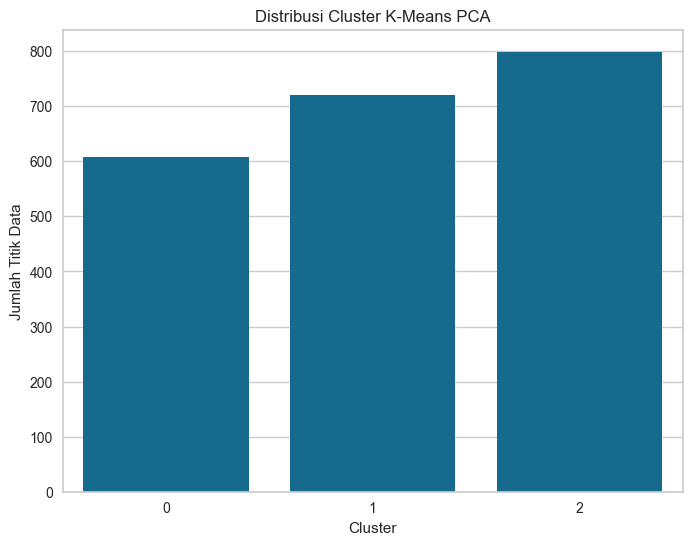

In [301]:
# Menghitung distribusi cluster
distribusi_cluster = hasil_clustering['Cluster_KmeansPCA'].value_counts().reset_index()

# Mengganti nama kolom
distribusi_cluster.columns = ['Cluster', 'Jumlah Titik Data']

# Mengurutkan berdasarkan cluster
distribusi_cluster = distribusi_cluster.sort_values(by='Cluster')

# Menampilkan tabel distribusi cluster
print(distribusi_cluster)

# Membuat bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
sns.barplot(x='Cluster', y='Jumlah Titik Data', data=distribusi_cluster)
plt.title('Distribusi Cluster K-Means PCA')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Titik Data')
plt.show()

**Insights:**
- Bar chart diatas menunjukkan distribusi kluster, dimana kluster 3 (indeks ke 2) paling banyak sementara kluster 2 (indeks ke 1) paling sedikit

In [300]:
pivot_numeric = (hasil_clustering.select_dtypes('number').groupby('Cluster_KmeansPCA').agg('mean'))
pivot_numeric.head()

,index,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
Cluster_KmeansPCA,,,,,,,,,,,,,
0,1367.495881,17.376675,1710.927834,601.073817,9.930524,1145.203088,197474.706057,389981.967330,42.065114,0.794737,0.942837,3.37397,76.823993
1,1347.256588,17.453646,1768.464265,1275.916863,10.009606,994.895029,282258.647434,589800.023519,41.202211,0.766657,1.043013,5.49792,74.417708
2,1394.369212,17.919349,1765.517462,1157.850421,9.940651,983.387258,279540.960275,564913.140008,42.068168,0.807219,1.008776,5.53567,74.479412


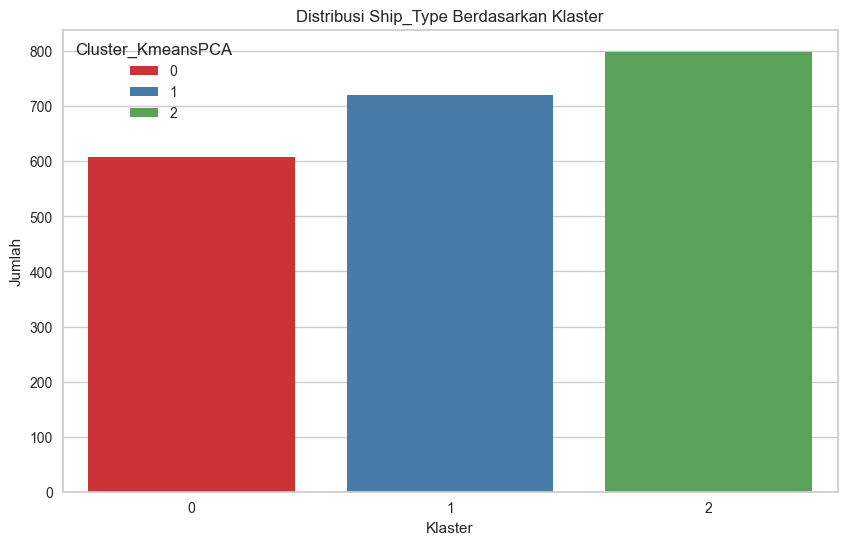

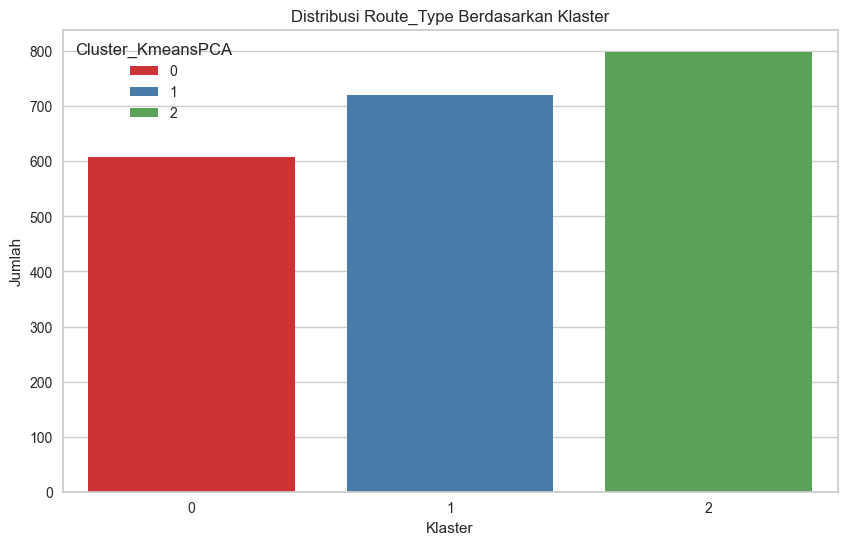

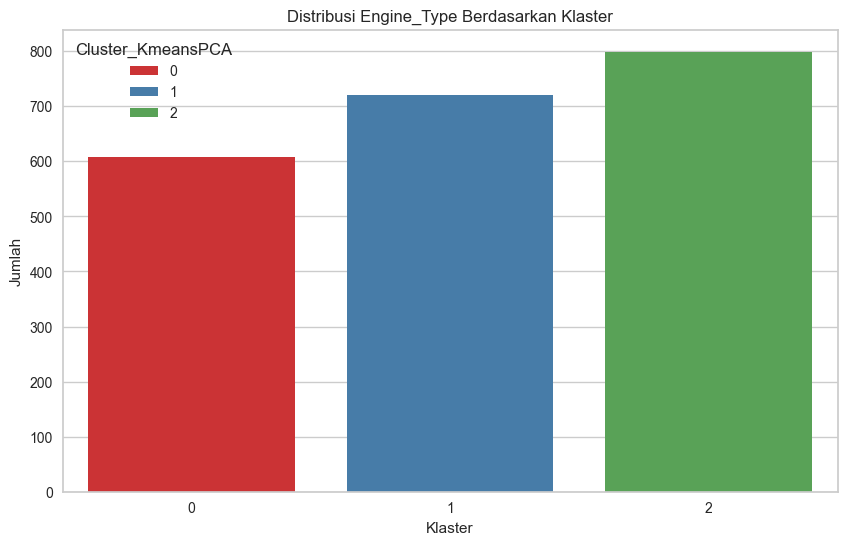

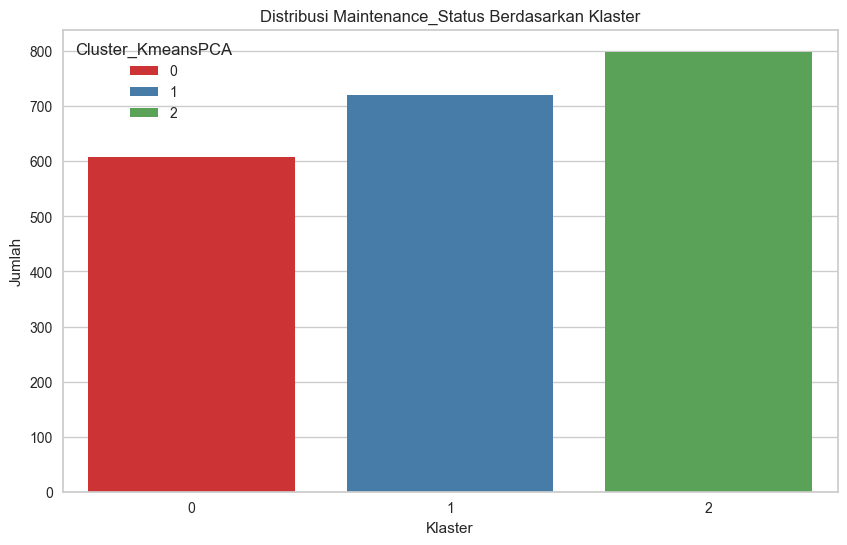

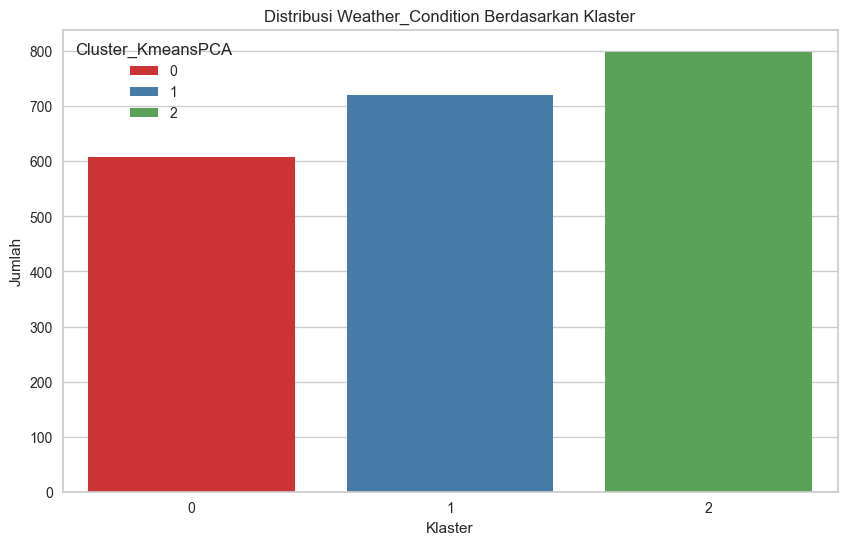

In [282]:
pivot_object = (
    hasil_clustering.select_dtypes(include='object')
    .groupby(hasil_clustering['Cluster_KmeansPCA'])
    .count()
)

pivot_object.head()
# Menampilkan hasil dalam bentuk bar chart
for column in pivot_object.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=pivot_object.index, 
                y=pivot_object[column],
                hue=pivot_numeric.index, data=pivot_numeric,
                palette='Set1' # Mengatur palet warna (ganti dengan palet lain jika perlu))
    )
    plt.title(f'Distribusi {column} Berdasarkan Klaster')
    plt.xlabel('Klaster')
    plt.ylabel('Jumlah')
    
    plt.show()


Frekuensi untuk Ship_Type:
Ship_Type          Bulk Carrier  Container Ship  Fish Carrier  Tanker
Cluster_KmeansPCA                                                    
0                           166             140           140     161
1                           174             198           168     181
2                           210             186           213     190


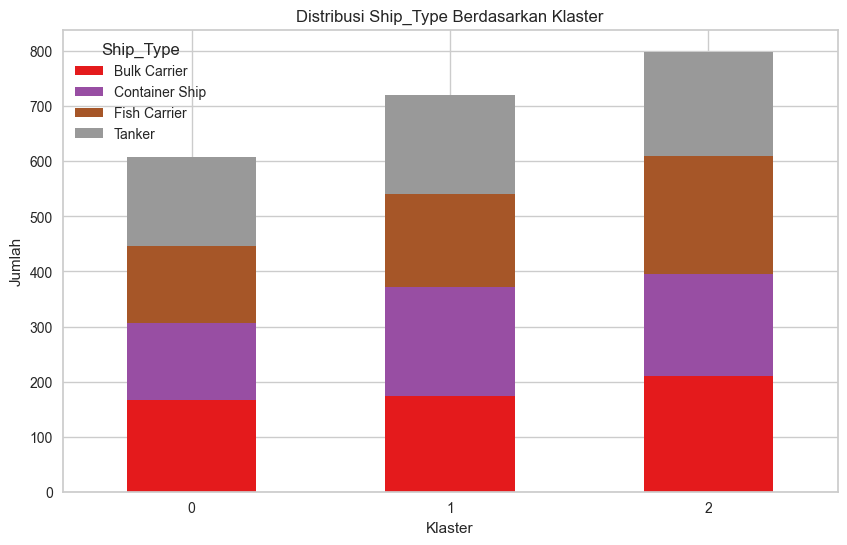


Frekuensi untuk Route_Type:
Route_Type         Coastal  Long-haul  Short-haul  Transoceanic
Cluster_KmeansPCA                                              
0                      151        227         168            61
1                      382        339           0             0
2                        0          0         345           454


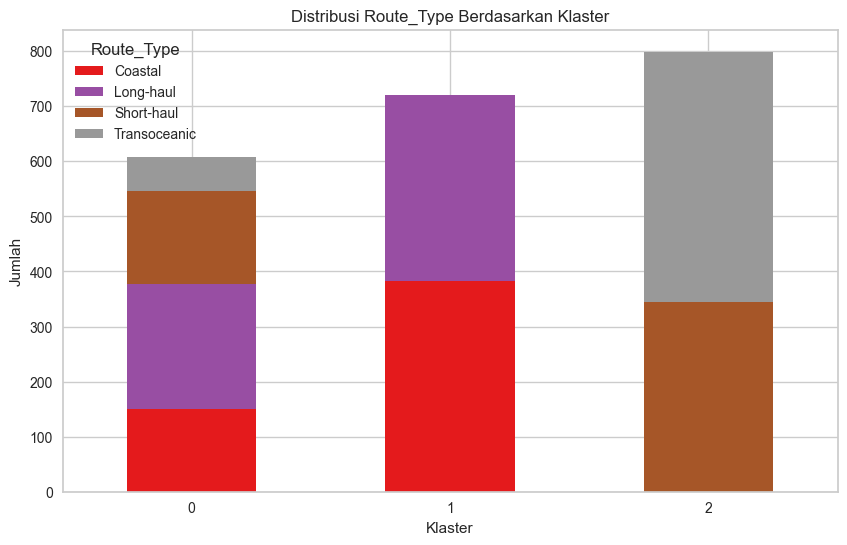


Frekuensi untuk Engine_Type:
Engine_Type        Diesel  Heavy Fuel Oil (HFO)  Steam Turbine
Cluster_KmeansPCA                                             
0                     194                   198            215
1                     259                   239            223
2                     268                   265            266


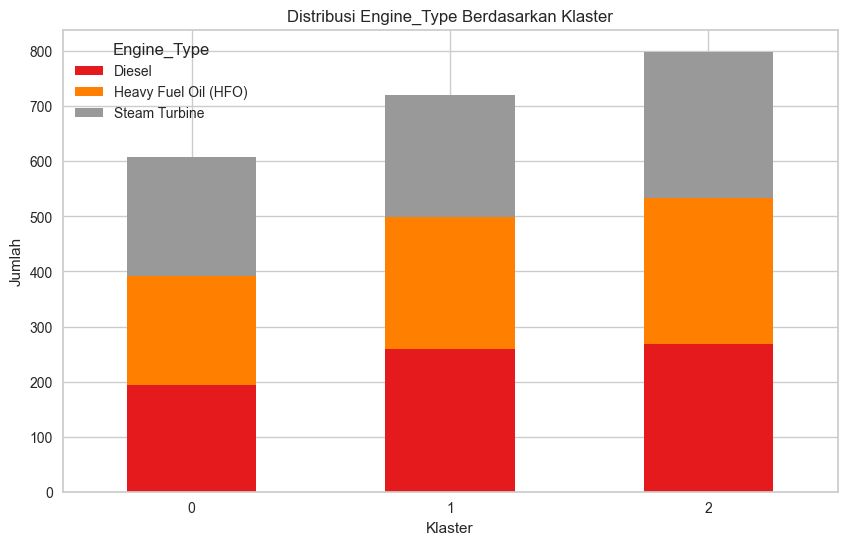


Frekuensi untuk Maintenance_Status:
Maintenance_Status  Critical  Fair  Good
Cluster_KmeansPCA                       
0                        213   231   163
1                        217   229   275
2                        286   253   260


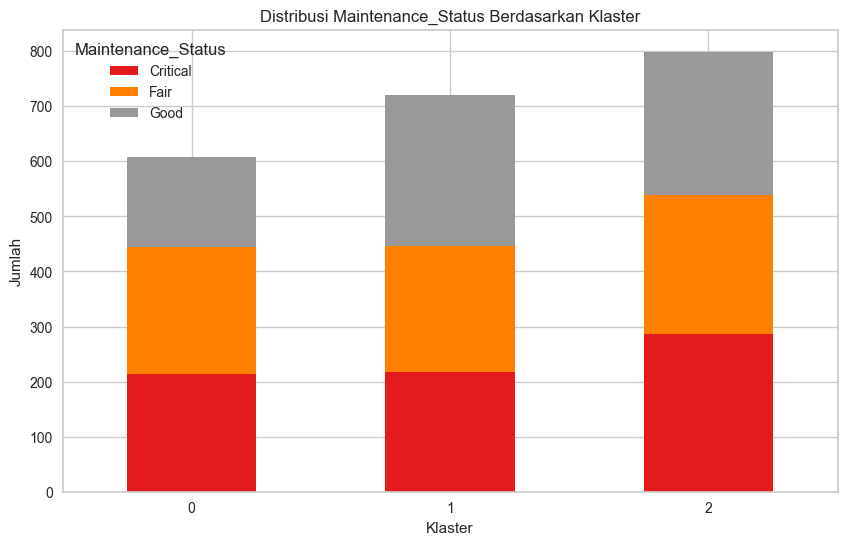


Frekuensi untuk Weather_Condition:
Weather_Condition  Calm  Moderate  Rough
Cluster_KmeansPCA                       
0                   235       184    188
1                   252       246    223
2                   237       308    254


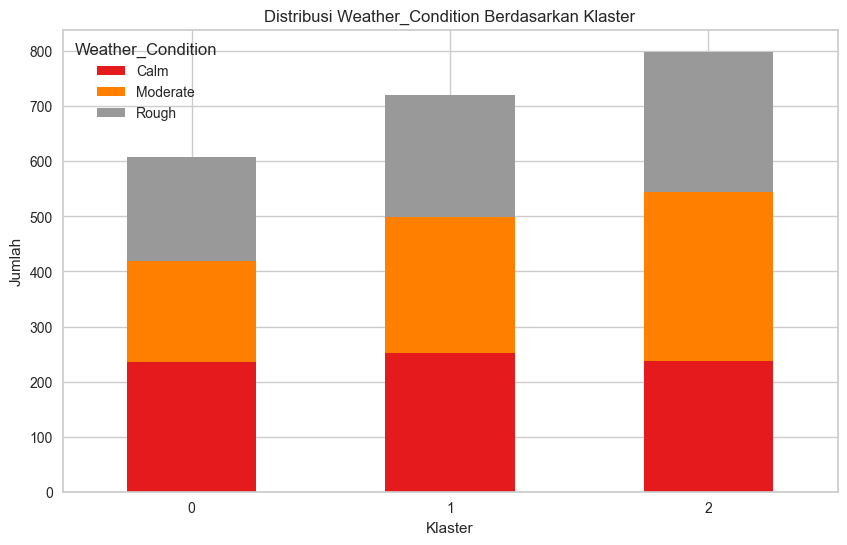

In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil semua kolom bertipe objek
object_columns = hasil_clustering.select_dtypes(include='object').columns

# Iterasi melalui setiap kolom bertipe objek
for column in object_columns:
    # Menghitung frekuensi kategori berdasarkan Cluster_KmeansPCA
    pivot_object = pd.crosstab(hasil_clustering['Cluster_KmeansPCA'], hasil_clustering[column])

    # Menampilkan hasil pivot
    print(f"\nFrekuensi untuk {column}:")
    print(pivot_object)

    # Menampilkan hasil dalam bentuk bar chart
    plt.figure(figsize=(10, 6))
    pivot_object.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set1')
    plt.title(f'Distribusi {column} Berdasarkan Klaster')
    plt.xlabel('Klaster')
    plt.ylabel('Jumlah')
    plt.legend(title=column)
    plt.xticks(rotation=0)  # Mengatur rotasi label sumbu x
    plt.show()


**Insights:**
- Berikut adalah ringkasan nilai dominan pada masing - masing kluster
- Ship_Type
    - kluster 1 : Bulk Carrier
    - kluster 2 : Container Ship
    - Kluster 3 : Fish Carrier

- Route_Type
    - kluster 1 : Long Haul 
    - kluster 2 : Coastal
    - Kluster 3 : Transoceanic


- Engine_Type
    - kluster 1 : Steam Turbine
    - kluster 2 : Diesel
    - Kluster 3 : Diesel

- Maintenance Status
    - kluster 1 : Fair
    - kluster 2 : Good
    - Kluster 3 : Critical


- Dari hasil tersebut didapatkan bahwa kluster 1 (indeks 0) cenderung memiliki kualitas kapal yang yang cukup baik dengan rute pelayaran jarak jauh (long haul). Selain itu kluster ini didominasi oleh kapal bermesin Steam turbine yang relatif mahal dalam perawatannya sehingga mungkin dapat berpengaruh terhadap efisiensi bisnisnya. 

- Pada cluster 2 (indeks 1) didominasi oleh Container Ship dengan rute pelayaran yang didominasi dengan pelayaran pesisir (coastal). Hal ini memungkinkan cluster 2 memiliki kecepatan dalam siklus bisnisnya (bongkar-muat) sehingga memungkinkan revenuenya lebih besar dibandingkan yang lain. Namun untuk melihat seberapa besar efisiensinya akan dianalisis lebih lanjut. 

- Pada kluster 3 (indeks 2) Rute pelayarannya pun didominasi oleh transoceania (lintas samudera). Rute pelayaran yang lebih jauh membuat jangka waktu maintenance lebih lama sehingga rentan terhadap kerusakan. Terbukti pada maintenane status, kluster 3 cenderung didominasi oleh status critical. 

                   Efficiency  cost_per_distance  engine_efficiency  \
Cluster_KmeansPCA                                                     
0                    0.506369         328.536530           1.493995   
1                    0.478567         221.220250           1.777539   
2                    0.494839         241.430979           1.795343   

                   Bussiness_resilience  
Cluster_KmeansPCA                        
0                         413626.216093  
1                         565477.061188  
2                         559998.759310  


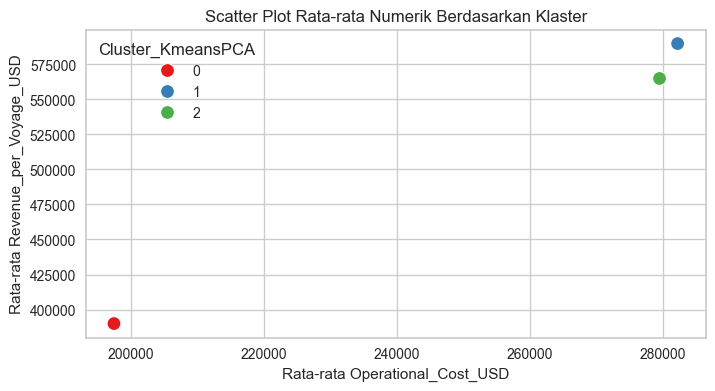

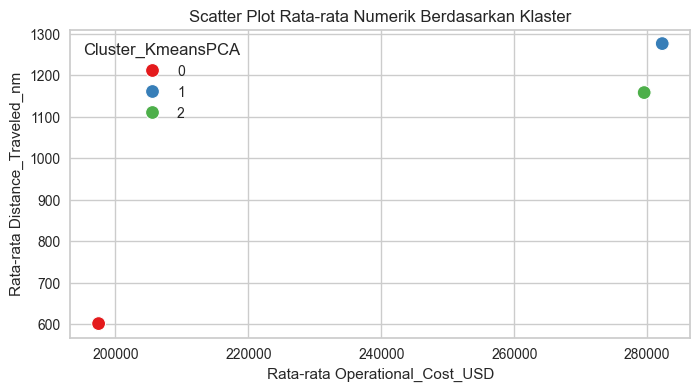

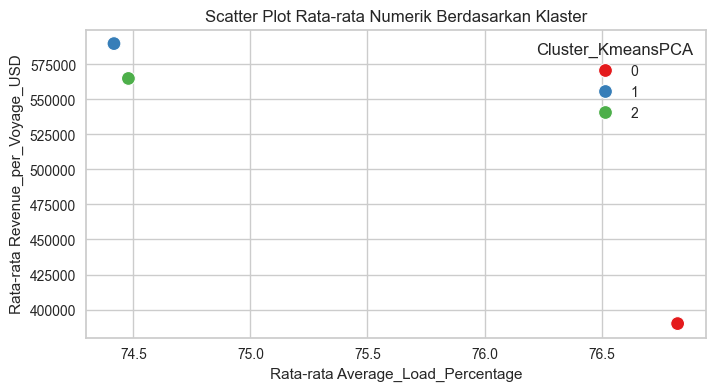

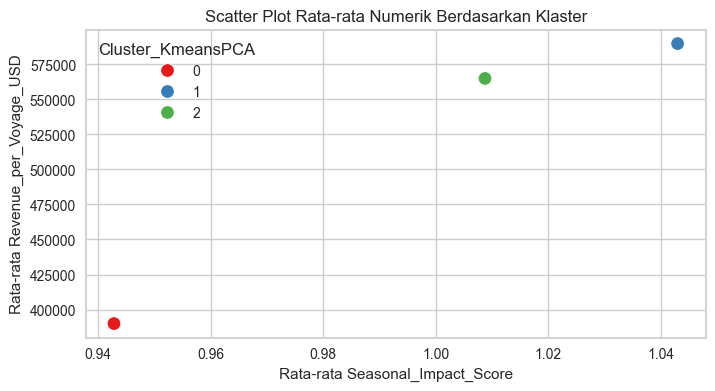

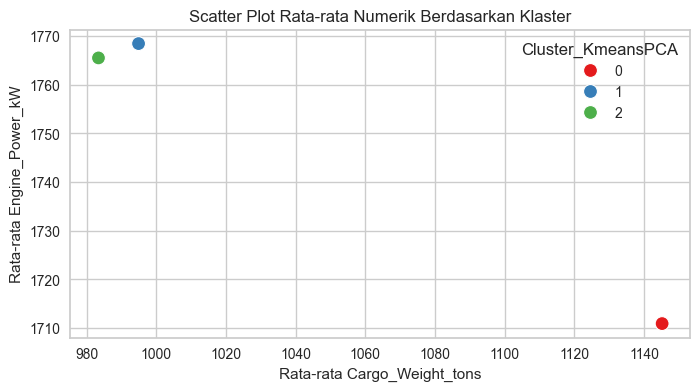

In [298]:
# Menghitung rata-rata numerik berdasarkan klaster
pivot_numeric = hasil_clustering.select_dtypes(include='number').groupby('Cluster_KmeansPCA').mean()

# Membuat scatter plot (Efisiensi)
plt.figure(figsize=(8, 4))  # Mengatur ukuran gambar
sns.scatterplot(x='Operational_Cost_USD', 
                y='Revenue_per_Voyage_USD', 
                hue=pivot_numeric.index, data=pivot_numeric,
                s=100,  # Mengatur ukuran lingkaran (s = size)
                palette='Set1' # Mengatur palet warna (ganti dengan palet lain jika perlu)
  )  
plt.title('Scatter Plot Rata-rata Numerik Berdasarkan Klaster')
plt.xlabel('Rata-rata Operational_Cost_USD')
plt.ylabel('Rata-rata Revenue_per_Voyage_USD')

# Menghitung efisiensi sebagai rasio Revenue per Operational Cost
pivot_numeric['Efficiency'] =  pivot_numeric['Operational_Cost_USD']/pivot_numeric['Revenue_per_Voyage_USD']


# Membuat scatter plot (Efisiensi Biaya Perjalanan)
plt.figure(figsize=(8, 4))  # Mengatur ukuran gambar
sns.scatterplot(x='Operational_Cost_USD', 
                y='Distance_Traveled_nm', 
                hue=pivot_numeric.index, data=pivot_numeric,
                s=100,  # Mengatur ukuran lingkaran (s = size)
                palette='Set1' # Mengatur palet warna (ganti dengan palet lain jika perlu)
  )  
plt.title('Scatter Plot Rata-rata Numerik Berdasarkan Klaster')
plt.xlabel('Rata-rata Operational_Cost_USD')
plt.ylabel('Rata-rata Distance_Traveled_nm')


# Menghitung efisiensi sebagai rasio cost per distance
pivot_numeric['cost_per_distance'] = pivot_numeric['Operational_Cost_USD']/pivot_numeric['Distance_Traveled_nm']



# Membuat scatter plot (Avg Load vs Revenue)
plt.figure(figsize=(8, 4))  # Mengatur ukuran gambar
sns.scatterplot(x='Average_Load_Percentage', 
                y='Revenue_per_Voyage_USD', 
                hue=pivot_numeric.index, data=pivot_numeric,
                s=100,  # Mengatur ukuran lingkaran (s = size)
                palette='Set1' # Mengatur palet warna (ganti dengan palet lain jika perlu)
  )  
plt.title('Scatter Plot Rata-rata Numerik Berdasarkan Klaster')
plt.xlabel('Rata-rata Average_Load_Percentage')
plt.ylabel('Rata-rata Revenue_per_Voyage_USD')


# Membuat scatter plot (Ketahanan bisnis terhadap dampak musiman)
plt.figure(figsize=(8, 4))  # Mengatur ukuran gambar
sns.scatterplot(x='Seasonal_Impact_Score',
                y='Revenue_per_Voyage_USD', 
                hue=pivot_numeric.index, data=pivot_numeric,
                s=100,  # Mengatur ukuran lingkaran (s = size)
                palette='Set1' # Mengatur palet warna (ganti dengan palet lain jika perlu)
  )  
plt.title('Scatter Plot Rata-rata Numerik Berdasarkan Klaster')
plt.xlabel('Rata-rata Seasonal_Impact_Score')
plt.ylabel('Rata-rata Revenue_per_Voyage_USD')

# Menghitung rasio Seasonal Impact Score terhadap Revenue per Voyage
pivot_numeric['Bussiness_resilience'] =  pivot_numeric['Revenue_per_Voyage_USD']/ pivot_numeric['Seasonal_Impact_Score']




# Membuat scatter plot (Efisiensi Mesin) 
plt.figure(figsize=(8, 4))  # Mengatur ukuran gambar
sns.scatterplot(x='Cargo_Weight_tons',
                y='Engine_Power_kW', 
                hue=pivot_numeric.index, data=pivot_numeric,
                s=100,  # Mengatur ukuran lingkaran (s = size)
                palette='Set1' # Mengatur palet warna (ganti dengan palet lain jika perlu)
  )  
plt.title('Scatter Plot Rata-rata Numerik Berdasarkan Klaster')
plt.xlabel('Rata-rata Cargo_Weight_tons')
plt.ylabel('Rata-rata Engine_Power_kW')

pivot_numeric['engine_efficiency'] = pivot_numeric['Engine_Power_kW']/pivot_numeric['Cargo_Weight_tons']

# Menampilkan hasil
print(pivot_numeric[['Efficiency', 'cost_per_distance', 'engine_efficiency','Bussiness_resilience']])

plt.show()

**Insights:**
- **Efficiency**(menilai berapa jumlah biaya yang dikeluarkan untuk menghasilkan 1 unit revenue)
- kluster 1 :   0.50 (Tidak efisien)
- kluster 2 : 0.47 (Sangat Efisien)
- kluster 3 : 0.49 (Moderat)

-**cost per distance** menilai berapa jumlah biaya yang dikeluarkan setiap perjalanan mil laut. 
- kluster 1 : 328.53 USD per Nm (Tidak efisien)
- kluster 2 : 221.22 USD Per Nm (Sangat efisien)
- kluster 3 : 241.43 USD per Nm (Moderat)


- **engine efficiency** (menilai berapa daya mesin yang digunakan untuk mengangkut beban muatan) (semakin kecil nilainya semakin efisien daya mesin yang digunakan untuk mengangkut kargo per ton)
- kluster 1 : 1.49 (efisien dalam tenaga mesin)
- kluster 2 : 1.77 (Moderat)
- kluster 3 : 1.79 (Tidak efisien)


- **Business Resilience** (menilai seberapa Tangguh performance bisnis Ketika ada siklus musiman misalnya karena bencana atau siklus cuaca) (semakin besar nilainya semakin resilience). 
- kluster 1 : 413626 (tidak resiien)
- kluster 2 : 565477 (sangat resilien)
- kluster 3 : 559998 (moderat)

# Interpretasi
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1 (Indeks 0):
- **Analisis:**  
Kluster 1 dinilai paling tidak efisien sesuai dengan analisis sebelumnya, dimana rasio biaya operasional terhadap revenue yang paling besar. Hal ini selanjutnya dapat diperjelas bahwa biaya perjalanan per Nm juga besar. Selain itu cluster 1 ini lebih banyak didominasi oleh tipe mesin steam turbin. Selain itu kluster 1 juga paling tidak resilience terhadap siklus musiman. 


## Cluster 2 (Indeks 1):
- **Analisis:** 
Kluster 2 dinilai paling efisien dari segi bisnis dan biaya perjalanan. Namun moderat dalam hal efisiensi tenaga mesin. Lebih lanjut kluster 2 memiliki bisnis yang paling resilience dimana revenue tidak terpengaruh signifikan terhadap siklus musiman. 


## Cluster 3 (Indeks 2): 
- **Analisis:** 
kluster 3 dinilai moderat namun rentan terhadap kemungkinan biaya maintenance yang membengkak di masa depan karena didominasi oleh status maintenance critical. Meskipun didominasi oleh rute paling jauh (trans samudra), kluster ini cukup menghasilkan revenue yang baik meskipun tidak seefisien kluster 1. Jika dilihat secara musiman, ketahanan bisnis kluster ini juga relatif baik (moderat).

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [302]:
hasil_clustering.to_csv("hasil_clustering.csv", index=True)